# Project3 - Prediction of Customer Lifetime Value

__Objective__ - Customer lifetime value is an estimation of the net profit attributed to the entire future relationship with a customer. It is a very important metric in customer relationship management and helps in positioning products based on a customer’s lifetime value. 
<br>The objective of the project is to predict the customer lifetime value for an insurance company based on the data provided.


# About the Dataset
The dataset contains the following information of 9134 customers:
<br> __Customer__: Unique customer ID
<br> __State__: US province to where the customer belongs to
<br> __Coverage__: Nature of insurance coverage
<br> __Education__: Education level of customer
<br> __EmploymentStatus__: Employment status of the customer
<br> __Gender__: Gender of the customer
<br> __Income__: Customer annual income in USD
<br> __Location Code__: Type of location where customer lives
<br> __Marital Status__: Marital status of the customer
<br> __Monthly Premium Auto__: Monthly premium for auto insurance
<br> __Months Since Last Claim__: # of months before which the last claim was made
<br> __Months Since Policy Inception__: # of months before which the policy commenced
<br> __Number of Open Complaints__: # of unresolved complaints from the customer
<br> __Number of Policies__: # of policies with the current customer
<br> __Policy Type__: Type of policy
<br> __Policy__: Policy sub category
<br> __Renew Offer Type__: Offer given during renewal
<br> __Sales Channel__: Channel of sales
<br> __Total Claim Amount__: Amount claimed till date
<br> __Vehicle Class__: Type of vehicle
<br> __Vehicle Size__: Size of vehicle
<br> __Customer Lifetime Value__: Y variable


## Project Instructions:
1.	Perform the required data pre-processing to treat for missing values and outliers
2.	Perform exploratory data analysis to visualise the spread of each of the X variables and the relationship between the various X variables and the Y variable
3.	Build a regression model to predict the customer lifetime value
4.	Evaluate the model based on model performance measures for regression and recommend the most suitable model.
5.	Come up with recommendations / actionable insights based on the model and feature importance scores derived from the model.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

insurance = pd.read_csv('insurance.csv')
insurance.head()

,Customer,State,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Customer Lifetime Value
0,BU79786,Washington,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2763.519279
1,QZ44356,Arizona,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,6979.535903
2,AI49188,Nevada,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,12887.431650
3,WW63253,California,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,7645.861827
4,HB64268,Washington,Basic,Bachelor,Employed,M,43836,Rural,Single,73,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2813.692575


In [2]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 22 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               9134 non-null int64
Policy Type                      9134 non-null object
Policy                           9134 non-null object
Renew Offer Type                 91

In [3]:
# checking for null values in the dataset. this will hwlp me to analyse the null value treatment.

In [4]:
insurance.isnull().sum()

Customer                         0
State                            0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
Customer Lifetime Value          0
dtype: int64

In [5]:
#segregating object and float values:
# first excluding customer from dataset.

In [6]:
features_obj = ["State","Coverage","Education","EmploymentStatus","Gender","Location Code","Marital Status","Policy Type","Policy","Renew Offer Type","Sales Channel","Vehicle Class","Vehicle Size"] 
features_float = ["Income","Monthly Premium Auto","Months Since Last Claim","Months Since Policy Inception","Number of Open Complaints","Number of Policies","Total Claim Amount","Customer Lifetime Value"]

## Univariate and Bivariate Analysis of Categories.

In [7]:
insurance["State"].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64

<Figure size 432x288 with 0 Axes>

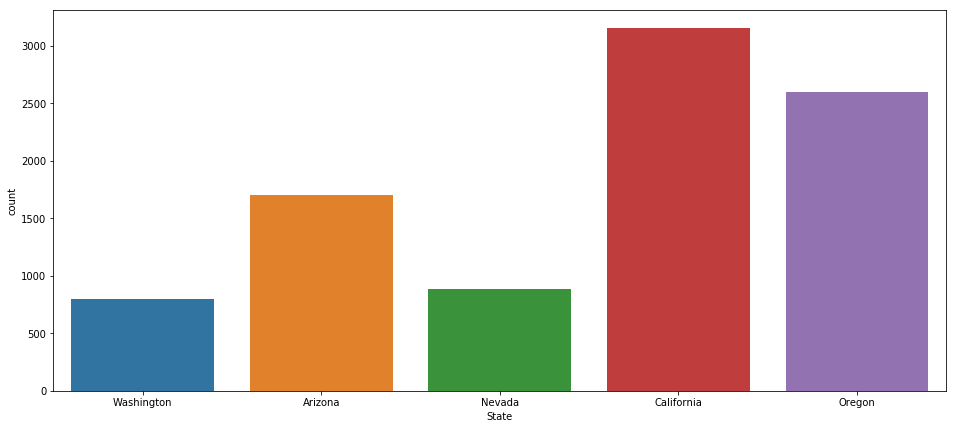

<Figure size 432x288 with 0 Axes>

In [8]:
plt.figure(figsize = (16,7))
sns.countplot(insurance["State"])
plt.figure()

In [9]:
insurance["Coverage"].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64

<Figure size 432x288 with 0 Axes>

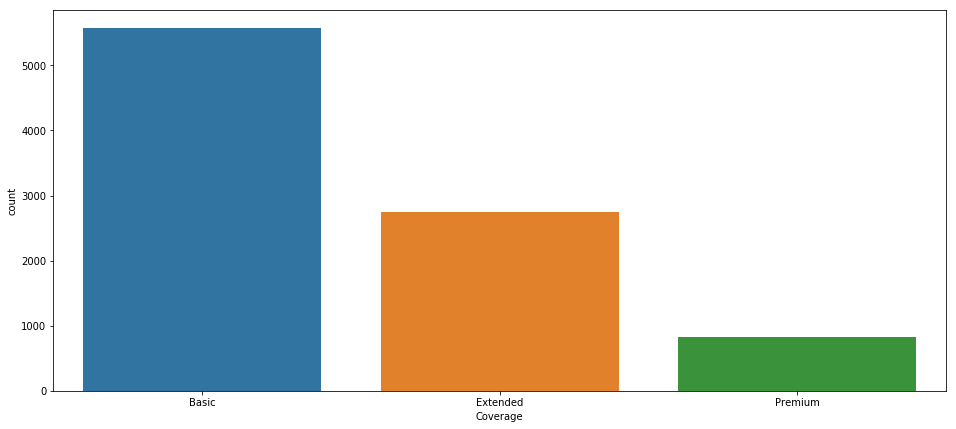

<Figure size 432x288 with 0 Axes>

In [10]:
plt.figure(figsize = (16,7))
sns.countplot(insurance["Coverage"])
plt.figure()

In [11]:
b = insurance.groupby(insurance["Coverage"])
b1 = b.get_group("Basic")
b2 = b.get_group("Extended")
b3 = b.get_group("Premium")


In [12]:
b1["State"].value_counts(),b2["State"].value_counts(),b3["State"].value_counts()

(California    1916
 Oregon        1596
 Arizona       1046
 Nevada         519
 Washington     491
 Name: State, dtype: int64, California    952
 Oregon        768
 Arizona       513
 Nevada        274
 Washington    235
 Name: State, dtype: int64, California    282
 Oregon        237
 Arizona       144
 Nevada         89
 Washington     72
 Name: State, dtype: int64)

<Figure size 432x288 with 0 Axes>

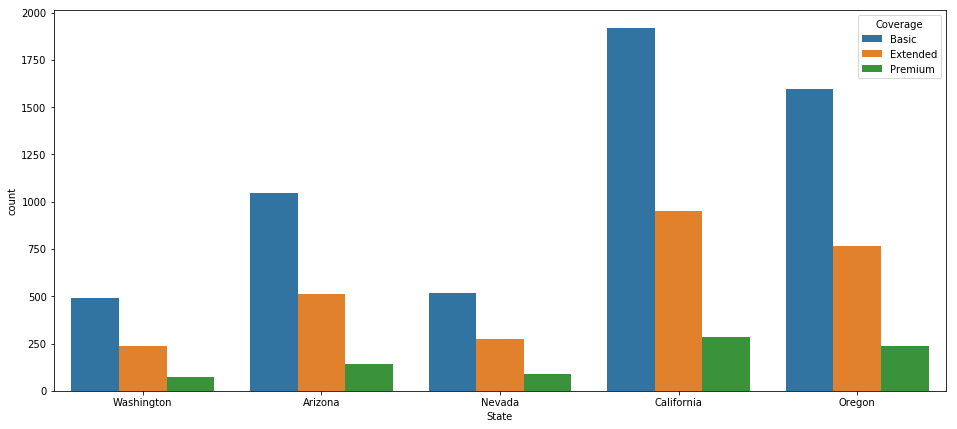

<Figure size 432x288 with 0 Axes>

In [13]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["State"],hue = insurance["Coverage"],data = insurance)
plt.figure()

In [14]:
insurance["Education"].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64

<Figure size 432x288 with 0 Axes>

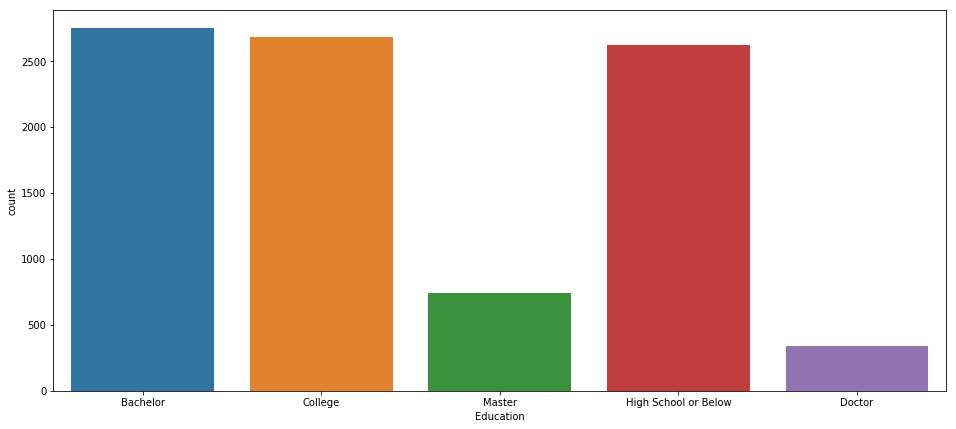

<Figure size 432x288 with 0 Axes>

In [15]:
plt.figure(figsize = (16,7))
sns.countplot(insurance["Education"])
plt.figure()

In [16]:
c = insurance.groupby(insurance["State"])
c1 = c.get_group("California")
c2 = c.get_group("Oregon")
c3 = c.get_group("Arizona")
c4 = c.get_group("Nevada")
c5 = c.get_group("Washington")


In [17]:
c1["Education"].value_counts(),c2["Education"].value_counts(),c3["Education"].value_counts(),c4["Education"].value_counts(),c5["Education"].value_counts()

(Bachelor                971
 College                 948
 High School or Below    877
 Master                  254
 Doctor                  100
 Name: Education, dtype: int64, Bachelor                776
 College                 776
 High School or Below    737
 Master                  205
 Doctor                  107
 Name: Education, dtype: int64, Bachelor                517
 High School or Below    493
 College                 489
 Master                  129
 Doctor                   75
 Name: Education, dtype: int64, High School or Below    268
 Bachelor                262
 College                 241
 Master                   81
 Doctor                   30
 Name: Education, dtype: int64, High School or Below    247
 College                 227
 Bachelor                222
 Master                   72
 Doctor                   30
 Name: Education, dtype: int64)

<Figure size 432x288 with 0 Axes>

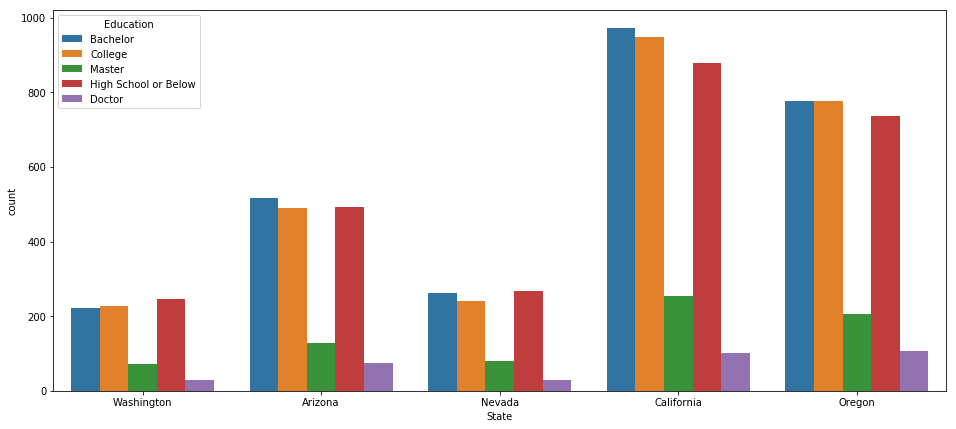

<Figure size 432x288 with 0 Axes>

In [18]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["State"],hue = insurance["Education"],data = insurance)
plt.figure()

In [19]:
b1["Education"].value_counts(),b2["Education"].value_counts(),b3["Education"].value_counts()

(Bachelor                1729
 College                 1628
 High School or Below    1561
 Master                   450
 Doctor                   200
 Name: Education, dtype: int64, College                 827
 High School or Below    800
 Bachelor                769
 Master                  224
 Doctor                  122
 Name: Education, dtype: int64, High School or Below    261
 Bachelor                250
 College                 226
 Master                   67
 Doctor                   20
 Name: Education, dtype: int64)

<Figure size 432x288 with 0 Axes>

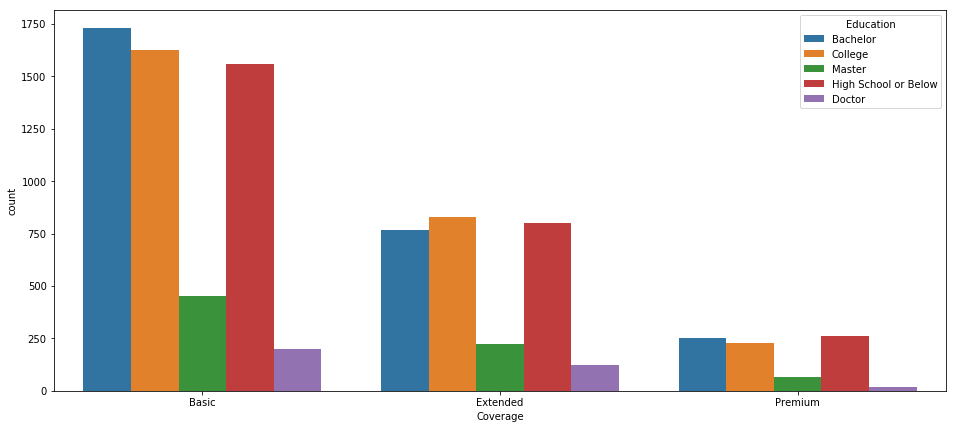

<Figure size 432x288 with 0 Axes>

In [20]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Coverage"],hue = insurance["Education"],data = insurance)
plt.figure()

In [21]:
insurance["EmploymentStatus"].value_counts(normalize = True)

Employed         0.623823
Unemployed       0.253668
Medical Leave    0.047296
Disabled         0.044340
Retired          0.030874
Name: EmploymentStatus, dtype: float64

<Figure size 432x288 with 0 Axes>

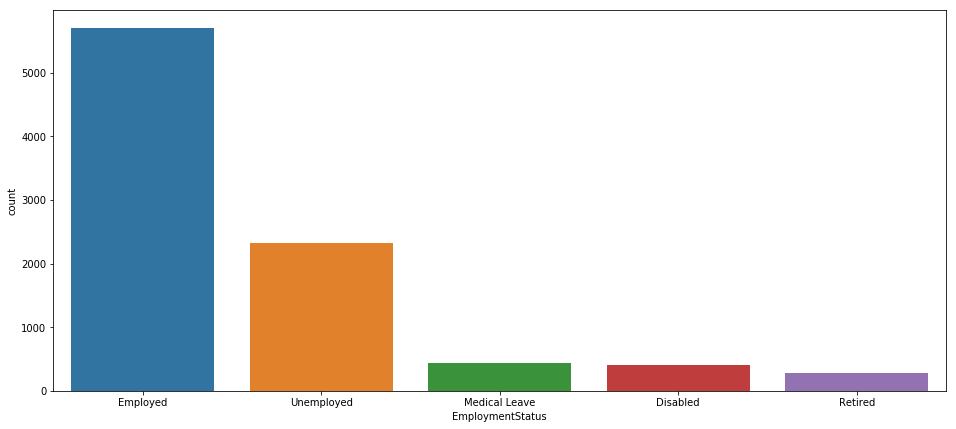

<Figure size 432x288 with 0 Axes>

In [22]:
plt.figure(figsize = (16,7))
sns.countplot(insurance["EmploymentStatus"])
plt.figure()

<Figure size 432x288 with 0 Axes>

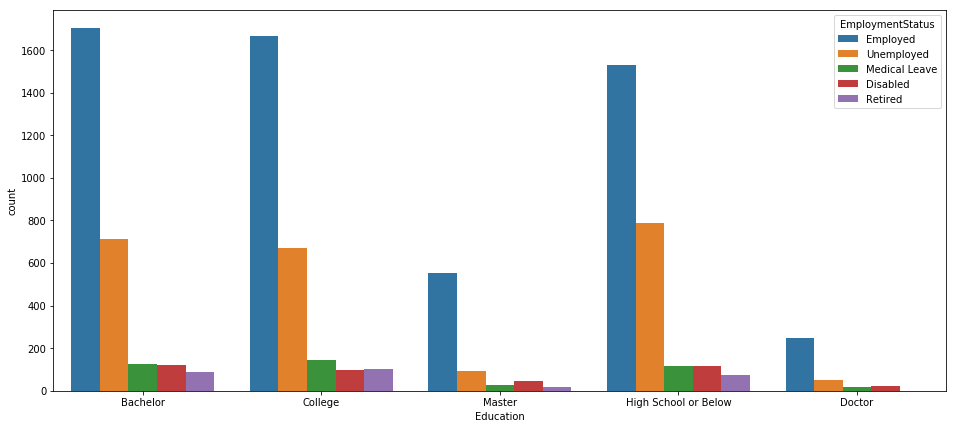

<Figure size 432x288 with 0 Axes>

In [23]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Education"],hue = insurance["EmploymentStatus"],data = insurance)
plt.figure()

<Figure size 432x288 with 0 Axes>

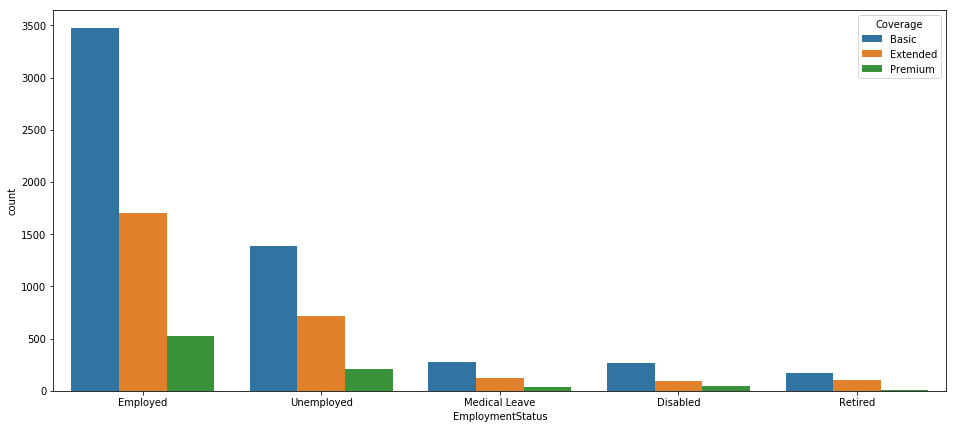

<Figure size 432x288 with 0 Axes>

In [24]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["EmploymentStatus"],hue = insurance["Coverage"],data = insurance)
plt.figure()

<Figure size 432x288 with 0 Axes>

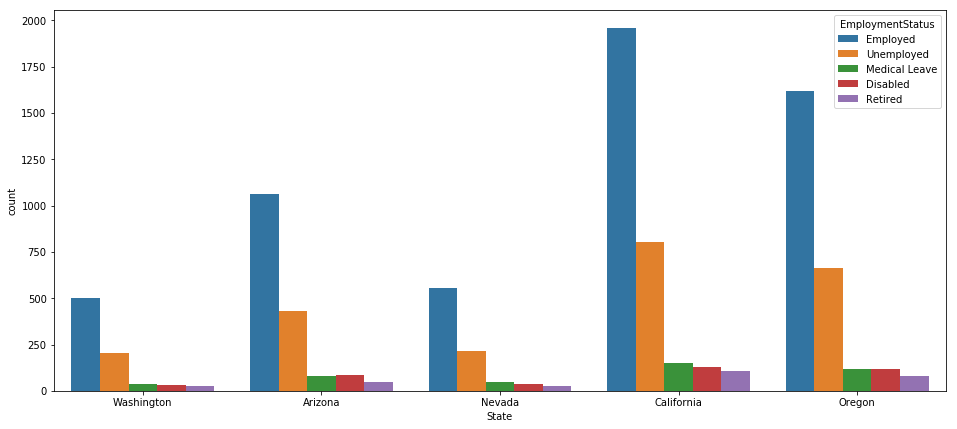

<Figure size 432x288 with 0 Axes>

In [25]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["State"],hue = insurance["EmploymentStatus"],data = insurance)
plt.figure()

In [26]:
c1["EmploymentStatus"].value_counts(),c2["EmploymentStatus"].value_counts()

(Employed         1957
 Unemployed        804
 Medical Leave     151
 Disabled          131
 Retired           107
 Name: EmploymentStatus, dtype: int64, Employed         1621
 Unemployed        664
 Disabled          120
 Medical Leave     118
 Retired            78
 Name: EmploymentStatus, dtype: int64)

In [27]:
insurance["Gender"].value_counts(normalize = True)

F    0.509963
M    0.490037
Name: Gender, dtype: float64

In [28]:
d = insurance.groupby(insurance["Gender"])
d1 = d.get_group("F")
d2 = d.get_group("M")

In [29]:
d1["Coverage"].value_counts(),d2["Coverage"].value_counts()

(Basic       2801
 Extended    1432
 Premium      425
 Name: Coverage, dtype: int64, Basic       2767
 Extended    1310
 Premium      399
 Name: Coverage, dtype: int64)

<Figure size 432x288 with 0 Axes>

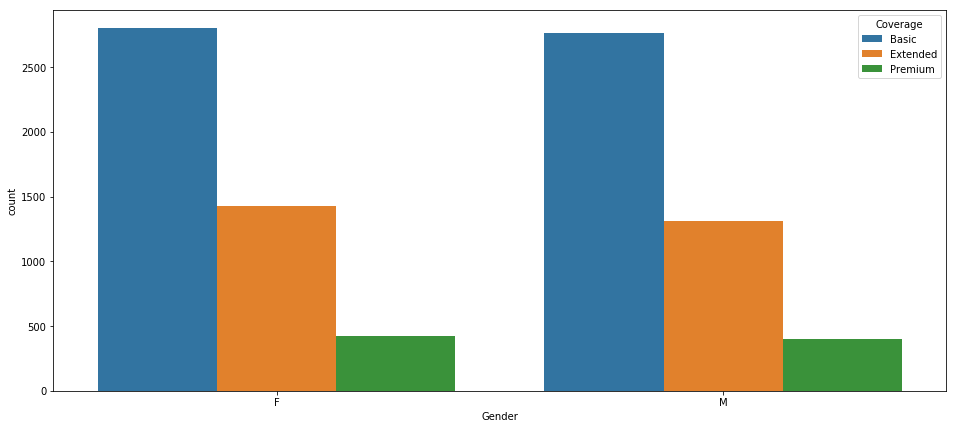

<Figure size 432x288 with 0 Axes>

In [30]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Gender"],hue = insurance["Coverage"],data = insurance)
plt.figure()

In [31]:
d1["State"].value_counts(),d2["State"].value_counts()

(California    1582
 Oregon        1334
 Arizona        875
 Nevada         455
 Washington     412
 Name: State, dtype: int64, California    1568
 Oregon        1267
 Arizona        828
 Nevada         427
 Washington     386
 Name: State, dtype: int64)

<Figure size 432x288 with 0 Axes>

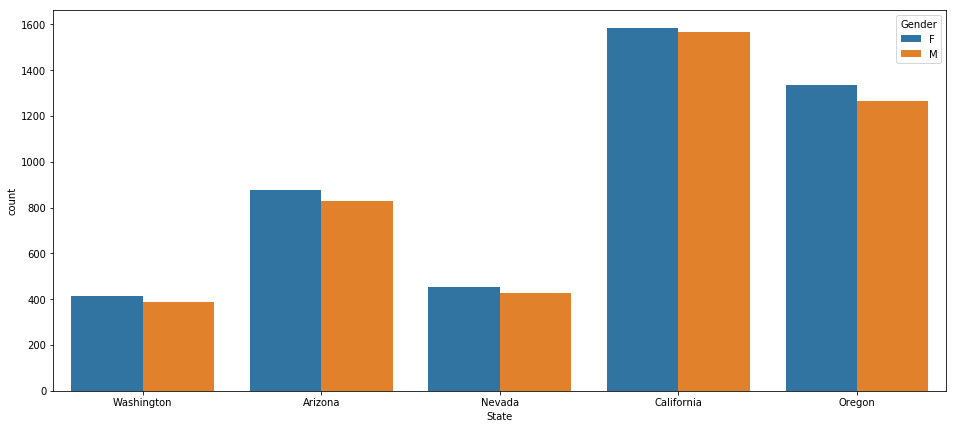

<Figure size 432x288 with 0 Axes>

In [32]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["State"],hue = insurance["Gender"],data = insurance)
plt.figure()

In [33]:
d1["Education"].value_counts(),d2["Education"].value_counts()

(Bachelor                1423
 College                 1352
 High School or Below    1321
 Master                   393
 Doctor                   169
 Name: Education, dtype: int64, College                 1329
 Bachelor                1325
 High School or Below    1301
 Master                   348
 Doctor                   173
 Name: Education, dtype: int64)

<Figure size 432x288 with 0 Axes>

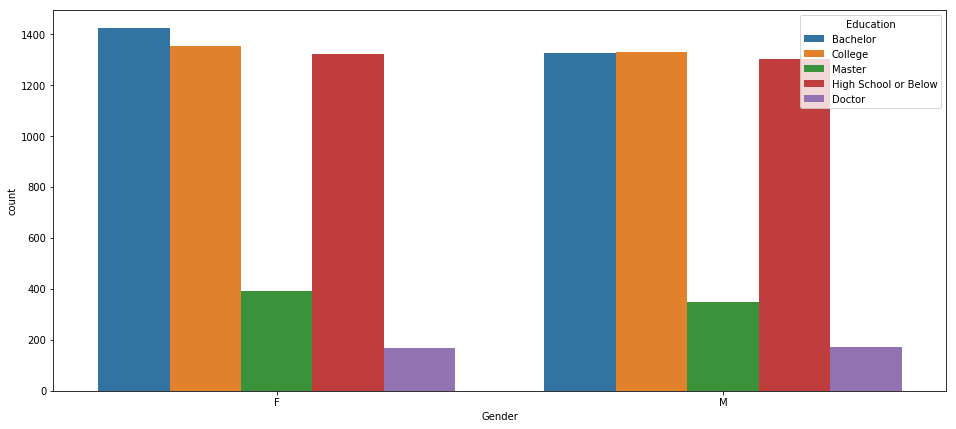

<Figure size 432x288 with 0 Axes>

In [34]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Gender"],hue = insurance["Education"],data = insurance)
plt.figure()

In [35]:
d1["EmploymentStatus"].value_counts(),d2["EmploymentStatus"].value_counts()

(Employed         2937
 Unemployed       1135
 Disabled          244
 Medical Leave     214
 Retired           128
 Name: EmploymentStatus, dtype: int64, Employed         2761
 Unemployed       1182
 Medical Leave     218
 Disabled          161
 Retired           154
 Name: EmploymentStatus, dtype: int64)

<Figure size 432x288 with 0 Axes>

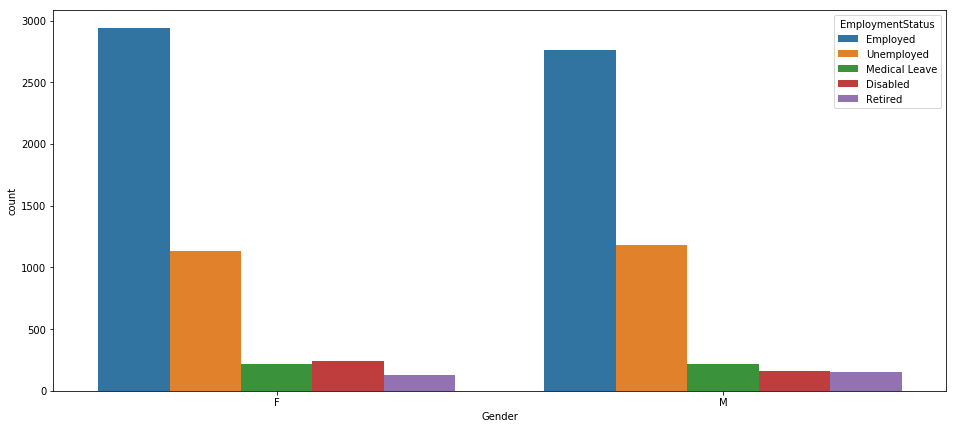

<Figure size 432x288 with 0 Axes>

In [36]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Gender"],hue = insurance["EmploymentStatus"],data = insurance)
plt.figure()

In [37]:
insurance["Location Code"].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64

<Figure size 432x288 with 0 Axes>

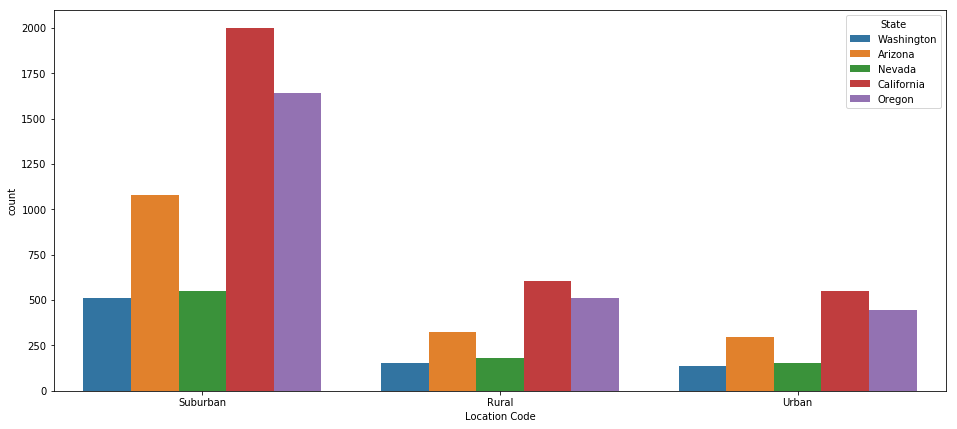

<Figure size 432x288 with 0 Axes>

In [38]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Location Code"],hue = insurance["State"],data = insurance)
plt.figure()

<Figure size 432x288 with 0 Axes>

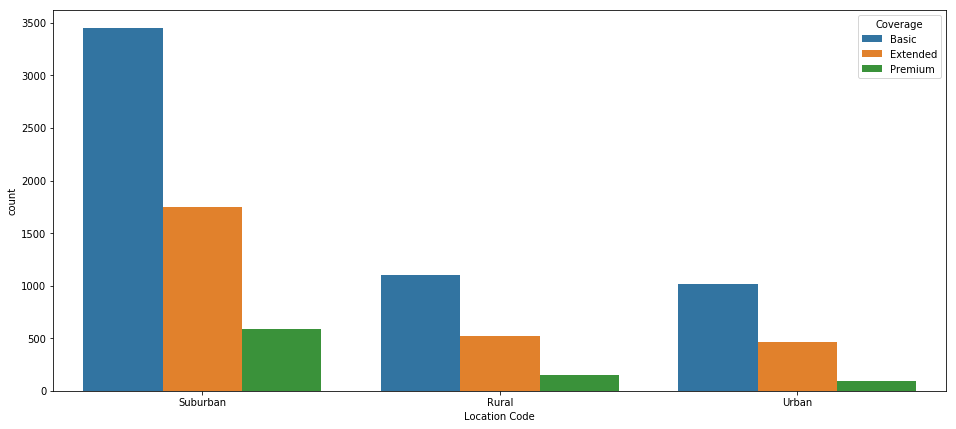

<Figure size 432x288 with 0 Axes>

In [39]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Location Code"],hue = insurance["Coverage"],data = insurance)
plt.figure()

<Figure size 432x288 with 0 Axes>

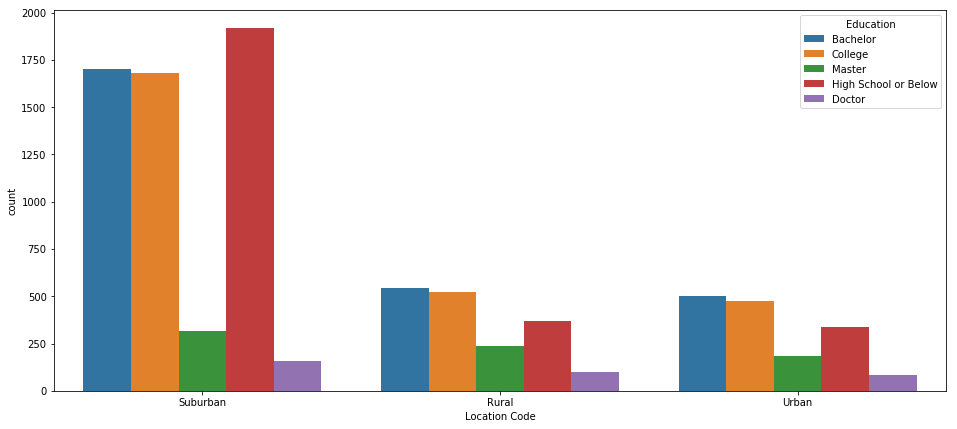

<Figure size 432x288 with 0 Axes>

In [40]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Location Code"],hue = insurance["Education"],data = insurance)
plt.figure()

In [41]:
e = insurance.groupby(insurance["Location Code"])
e1 = e.get_group("Suburban")
e2 = e.get_group("Rural")
e3 = e.get_group("Urban")


In [42]:
e1["EmploymentStatus"].value_counts(),e2["EmploymentStatus"].value_counts(),e3["EmploymentStatus"].value_counts()

(Employed         2688
 Unemployed       2122
 Medical Leave     354
 Disabled          341
 Retired           274
 Name: EmploymentStatus, dtype: int64, Employed         1596
 Unemployed        108
 Medical Leave      36
 Disabled           33
 Name: EmploymentStatus, dtype: int64, Employed         1414
 Unemployed         87
 Medical Leave      42
 Disabled           31
 Retired             8
 Name: EmploymentStatus, dtype: int64)

<Figure size 432x288 with 0 Axes>

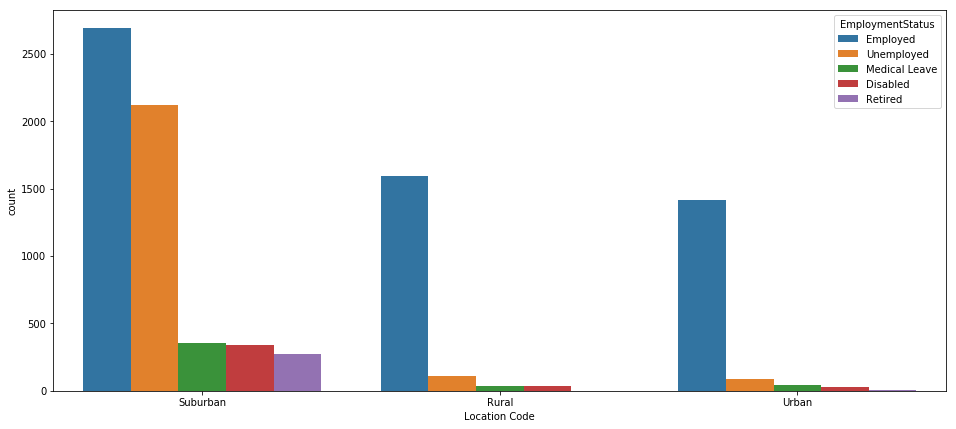

<Figure size 432x288 with 0 Axes>

In [43]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Location Code"],hue = insurance["EmploymentStatus"],data = insurance)
plt.figure()

In [44]:
insurance[features_obj].columns

Index(['State', 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
       'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [45]:
## LOCATION CODE AND GENDER

<Figure size 432x288 with 0 Axes>

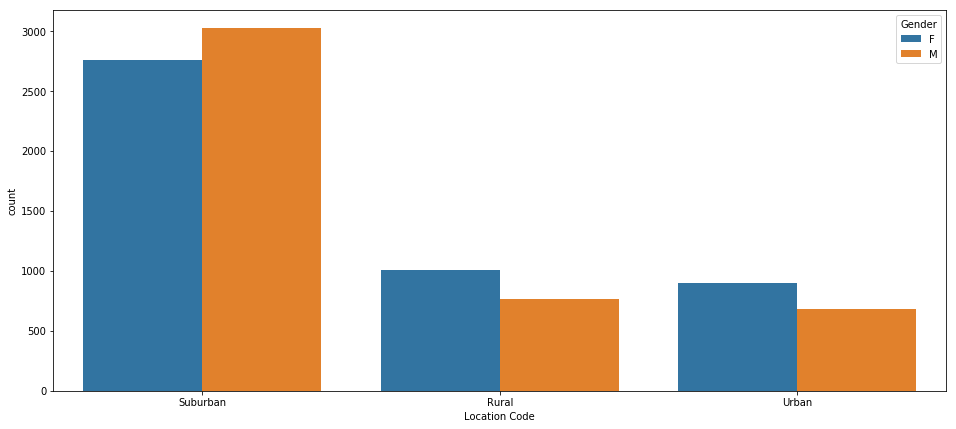

<Figure size 432x288 with 0 Axes>

In [46]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Location Code"],hue = insurance["Gender"],data = insurance)
plt.figure()

In [47]:
insurance["Marital Status"].value_counts()

Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64

<Figure size 432x288 with 0 Axes>

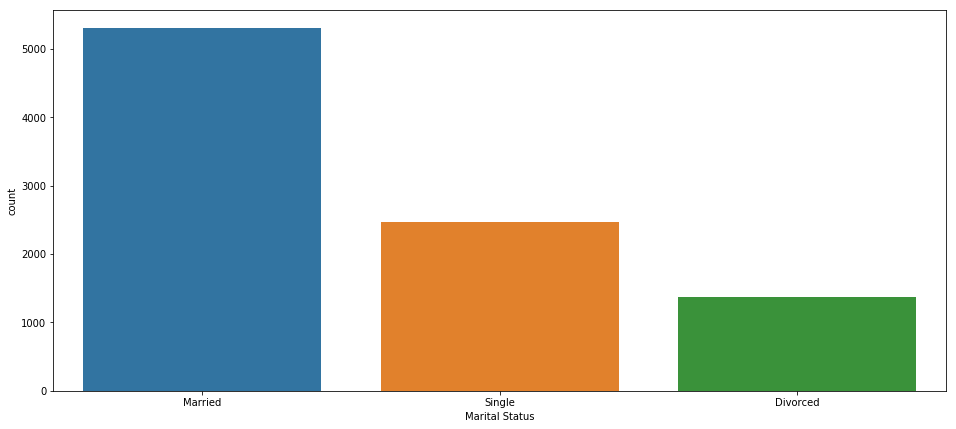

<Figure size 432x288 with 0 Axes>

In [48]:
plt.figure(figsize = (16,7))
sns.countplot(insurance["Marital Status"])
plt.figure()

<Figure size 432x288 with 0 Axes>

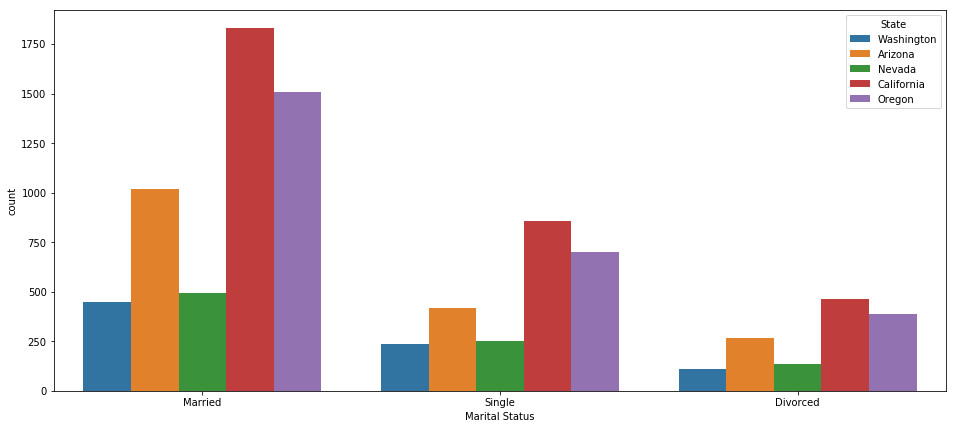

<Figure size 432x288 with 0 Axes>

In [49]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Marital Status"],hue = insurance["State"],data = insurance)
plt.figure()

<Figure size 432x288 with 0 Axes>

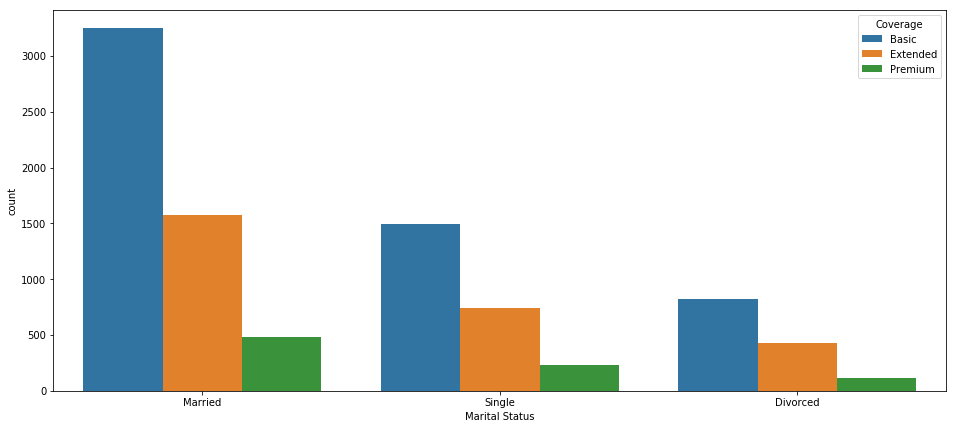

<Figure size 432x288 with 0 Axes>

In [50]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Marital Status"],hue = insurance["Coverage"],data = insurance)
plt.figure()

<Figure size 432x288 with 0 Axes>

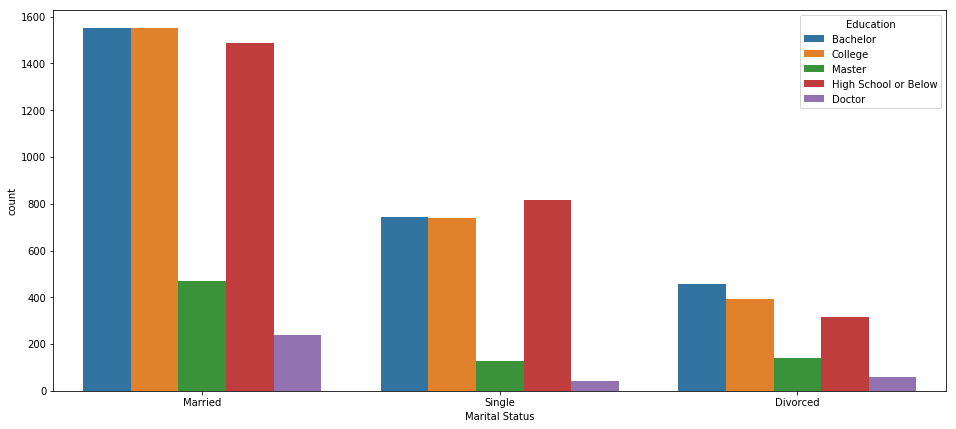

<Figure size 432x288 with 0 Axes>

In [51]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Marital Status"],hue = insurance["Education"],data = insurance)
plt.figure()

<Figure size 432x288 with 0 Axes>

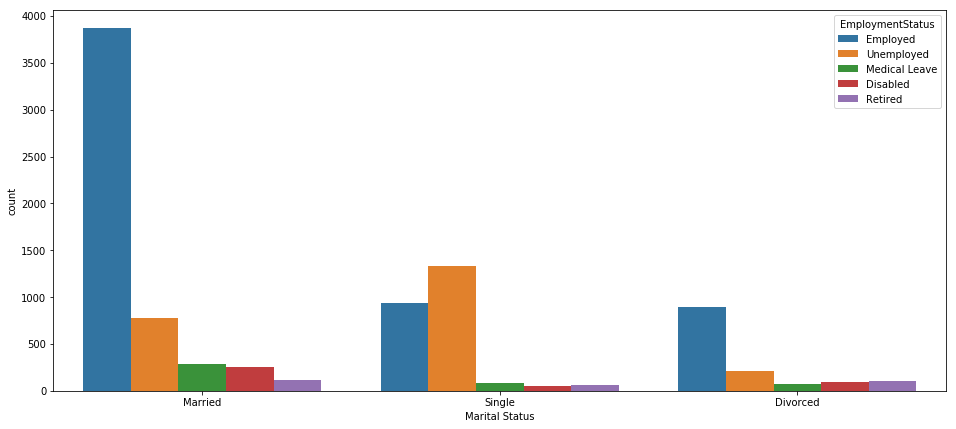

<Figure size 432x288 with 0 Axes>

In [52]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Marital Status"],hue = insurance["EmploymentStatus"],data = insurance)
plt.figure()

<Figure size 432x288 with 0 Axes>

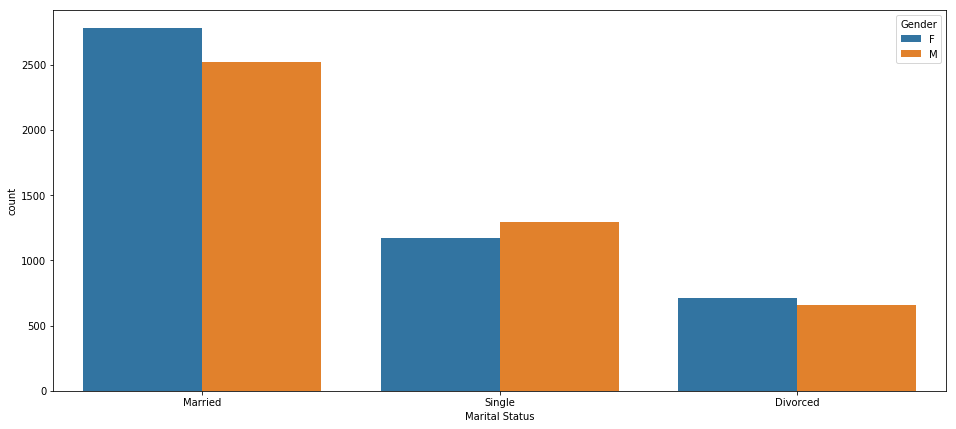

<Figure size 432x288 with 0 Axes>

In [53]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Marital Status"],hue = insurance["Gender"],data = insurance)
plt.figure()

<Figure size 432x288 with 0 Axes>

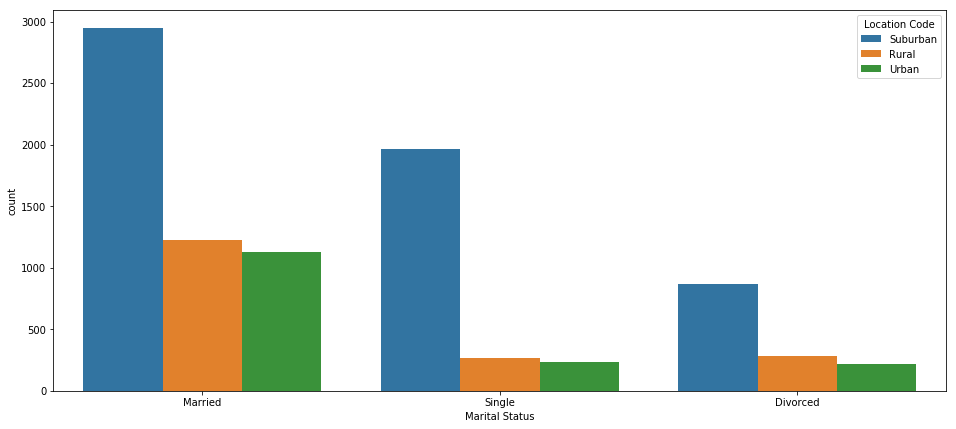

<Figure size 432x288 with 0 Axes>

In [54]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Marital Status"],hue = insurance["Location Code"],data = insurance)
plt.figure()

In [55]:
insurance["Policy Type"].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64

<Figure size 432x288 with 0 Axes>

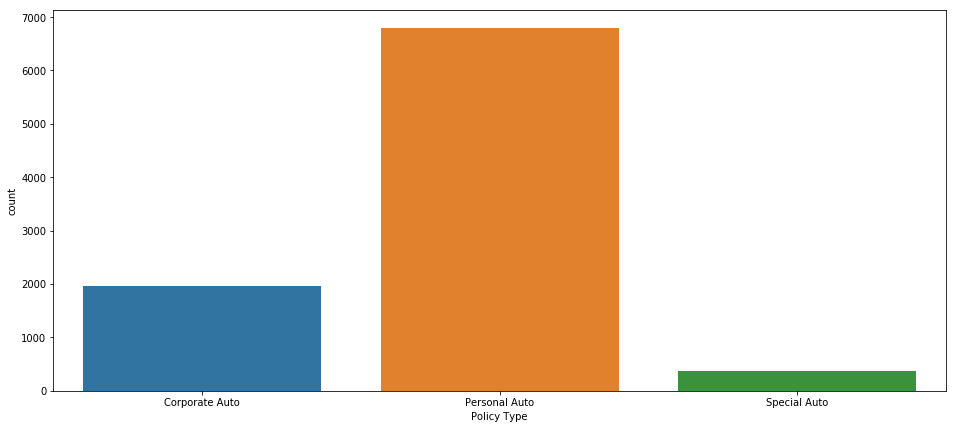

<Figure size 432x288 with 0 Axes>

In [56]:
plt.figure(figsize = (16,7))
sns.countplot(insurance["Policy Type"])
plt.figure()

<Figure size 432x288 with 0 Axes>

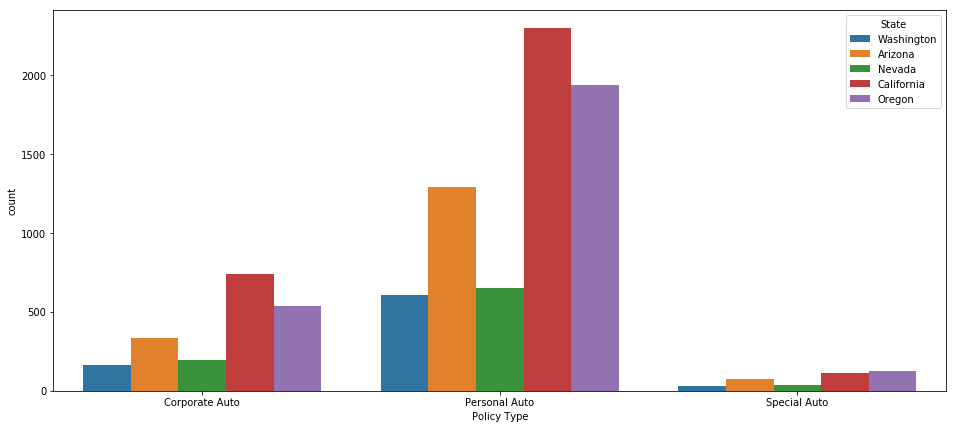

<Figure size 432x288 with 0 Axes>

In [57]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Policy Type"],hue = insurance["State"],data = insurance)
plt.figure()

<Figure size 432x288 with 0 Axes>

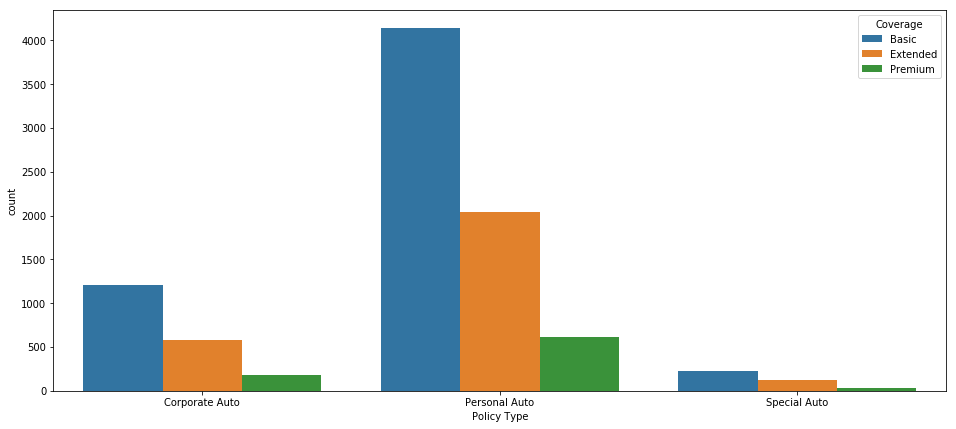

<Figure size 432x288 with 0 Axes>

In [58]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Policy Type"],hue = insurance["Coverage"],data = insurance)
plt.figure()

<Figure size 432x288 with 0 Axes>

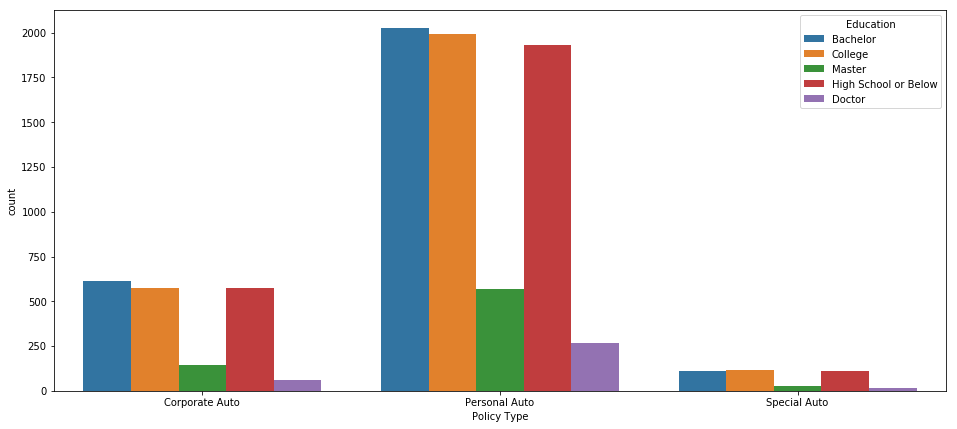

<Figure size 432x288 with 0 Axes>

In [59]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Policy Type"],hue = insurance["Education"],data = insurance)
plt.figure()

<Figure size 432x288 with 0 Axes>

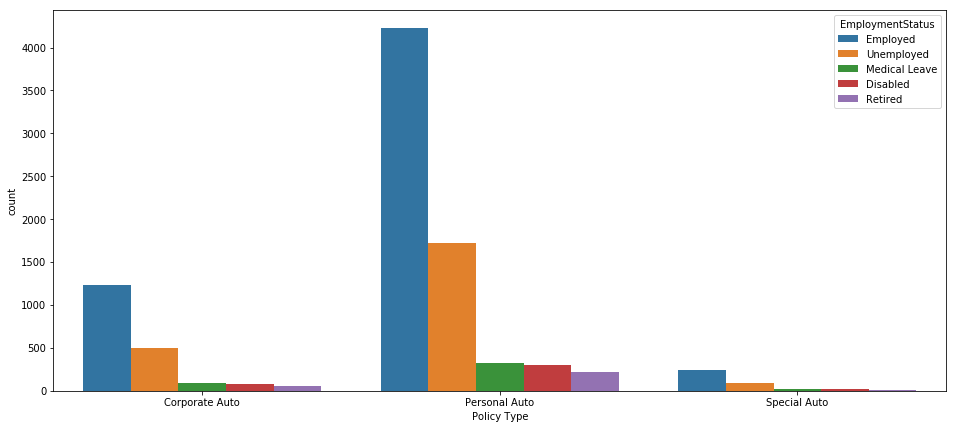

<Figure size 432x288 with 0 Axes>

In [60]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Policy Type"],hue = insurance["EmploymentStatus"],data = insurance)
plt.figure()

<Figure size 432x288 with 0 Axes>

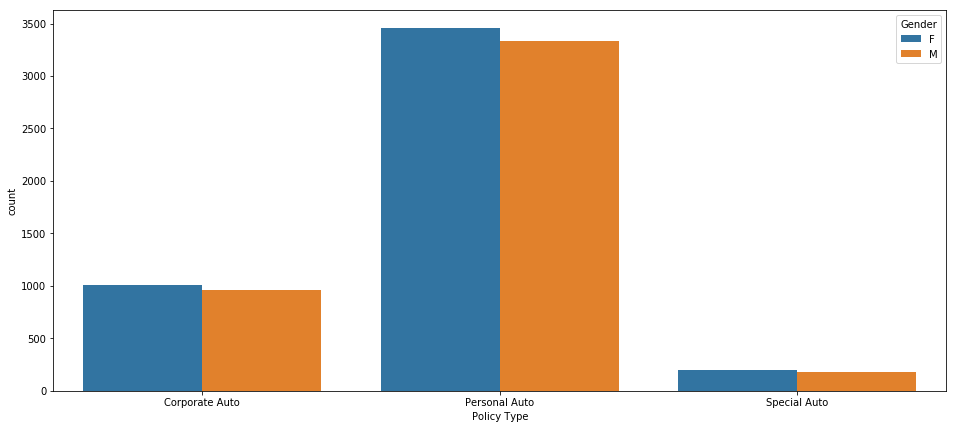

<Figure size 432x288 with 0 Axes>

In [61]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Policy Type"],hue = insurance["Gender"],data = insurance)
plt.figure()

In [62]:
insurance["Policy"].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64

<Figure size 432x288 with 0 Axes>

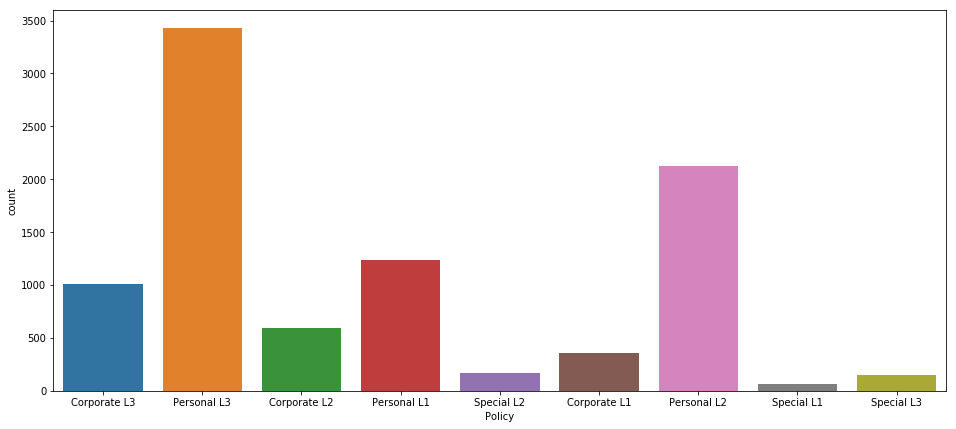

<Figure size 432x288 with 0 Axes>

In [63]:
plt.figure(figsize = (16,7))
sns.countplot(insurance["Policy"])
plt.figure()

<Figure size 432x288 with 0 Axes>

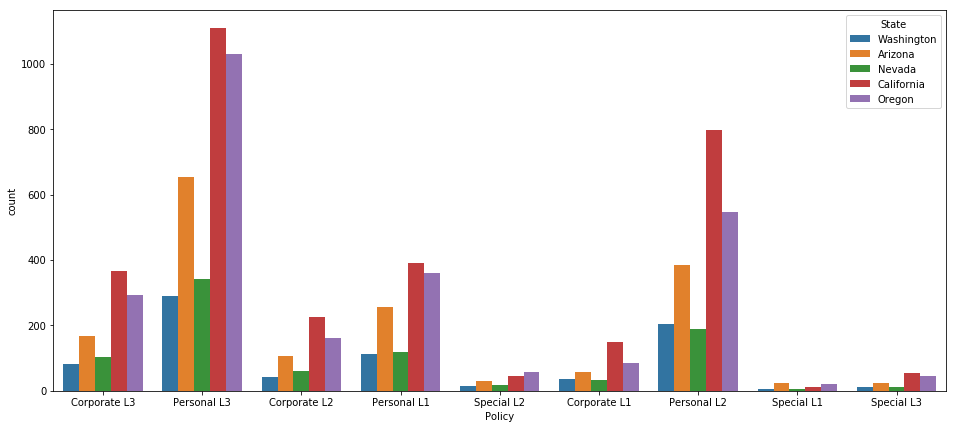

<Figure size 432x288 with 0 Axes>

In [64]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Policy"],hue = insurance["State"],data = insurance)
plt.figure()

<Figure size 432x288 with 0 Axes>

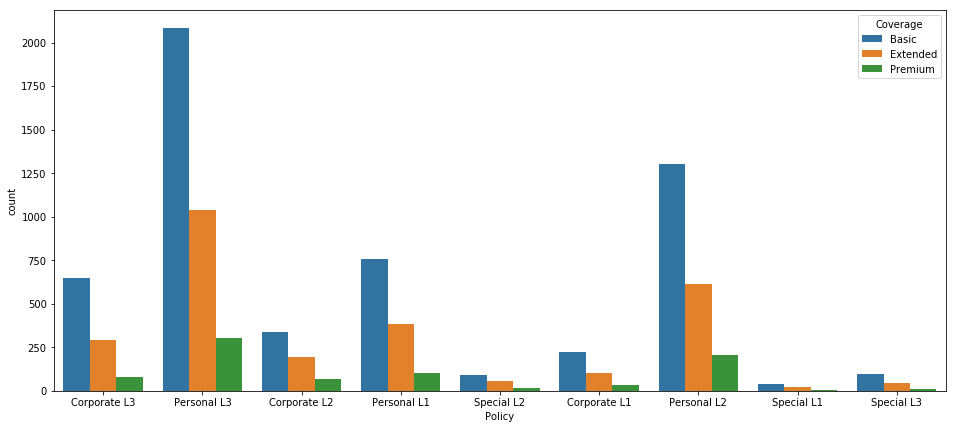

<Figure size 432x288 with 0 Axes>

In [65]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Policy"],hue = insurance["Coverage"],data = insurance)
plt.figure()

<Figure size 432x288 with 0 Axes>

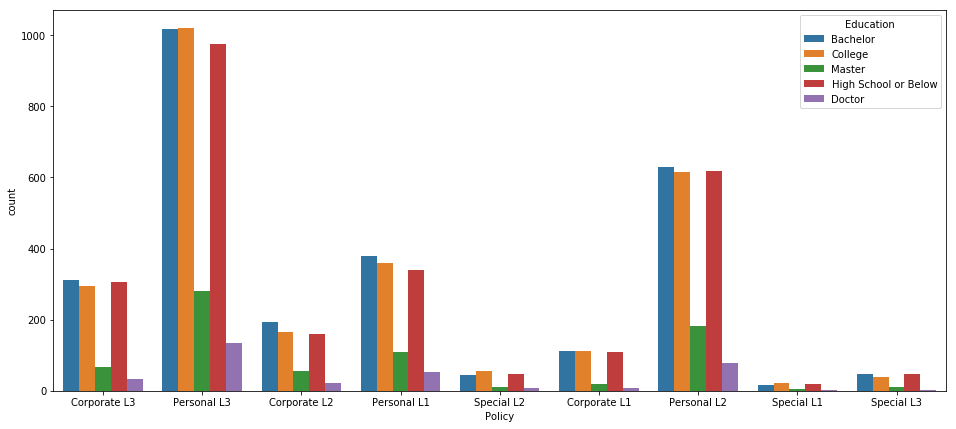

<Figure size 432x288 with 0 Axes>

In [66]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Policy"],hue = insurance["Education"],data = insurance)
plt.figure()

<Figure size 432x288 with 0 Axes>

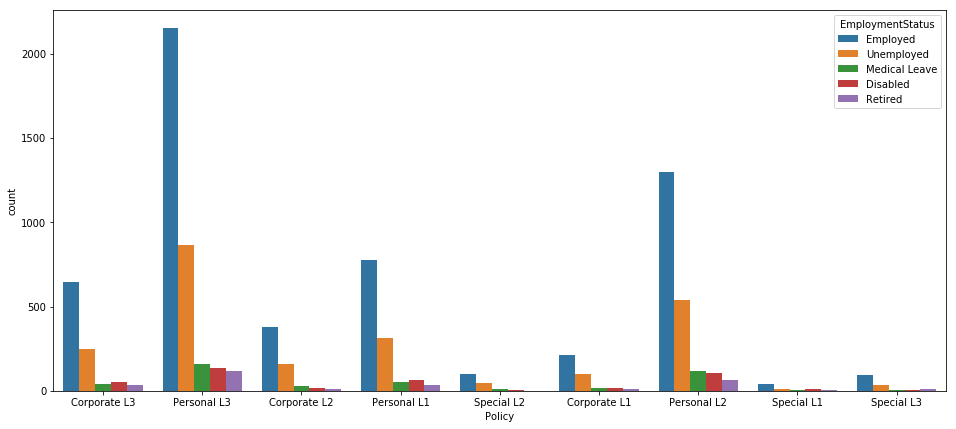

<Figure size 432x288 with 0 Axes>

In [67]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Policy"],hue = insurance["EmploymentStatus"],data = insurance)
plt.figure()

<Figure size 432x288 with 0 Axes>

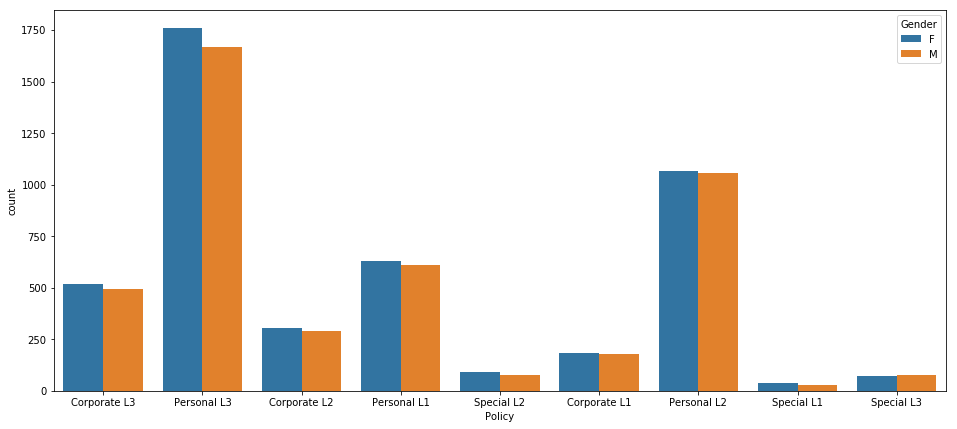

<Figure size 432x288 with 0 Axes>

In [68]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Policy"],hue = insurance["Gender"],data = insurance)
plt.figure()

In [69]:
insurance["Renew Offer Type"].value_counts()

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: Renew Offer Type, dtype: int64

<Figure size 432x288 with 0 Axes>

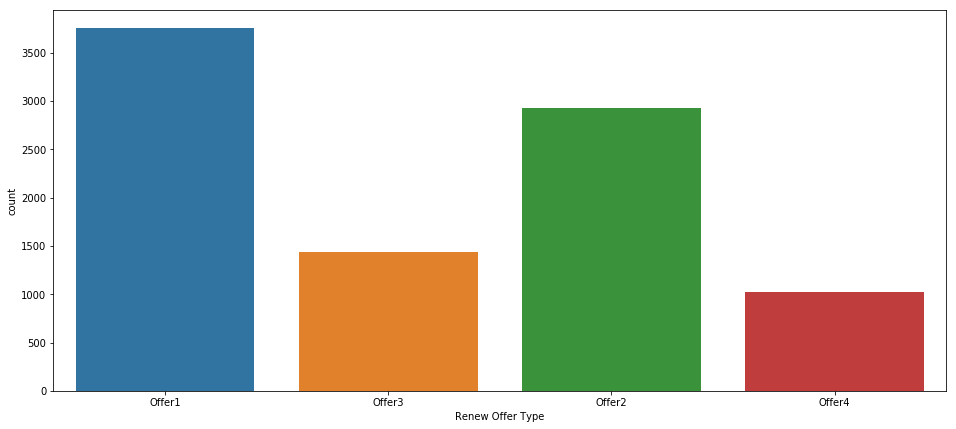

<Figure size 432x288 with 0 Axes>

In [70]:
plt.figure(figsize = (16,7))
sns.countplot(insurance["Renew Offer Type"])
plt.figure()

<Figure size 432x288 with 0 Axes>

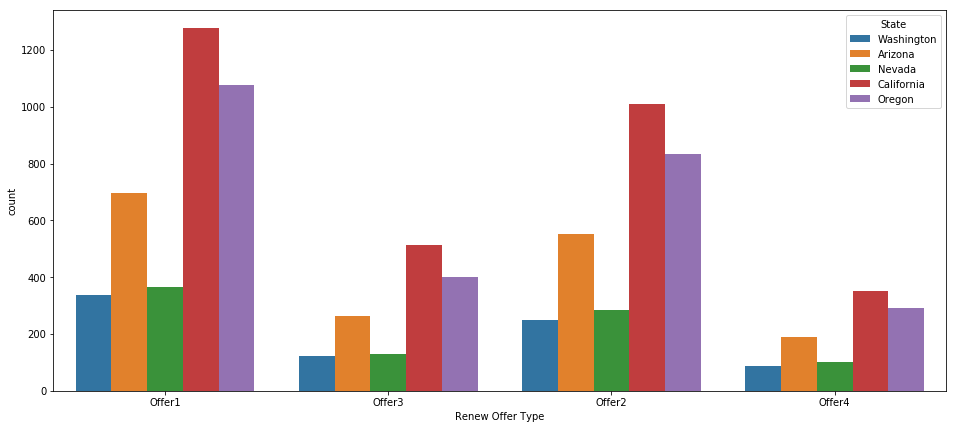

<Figure size 432x288 with 0 Axes>

In [71]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Renew Offer Type"],hue = insurance["State"],data = insurance)
plt.figure()

<Figure size 432x288 with 0 Axes>

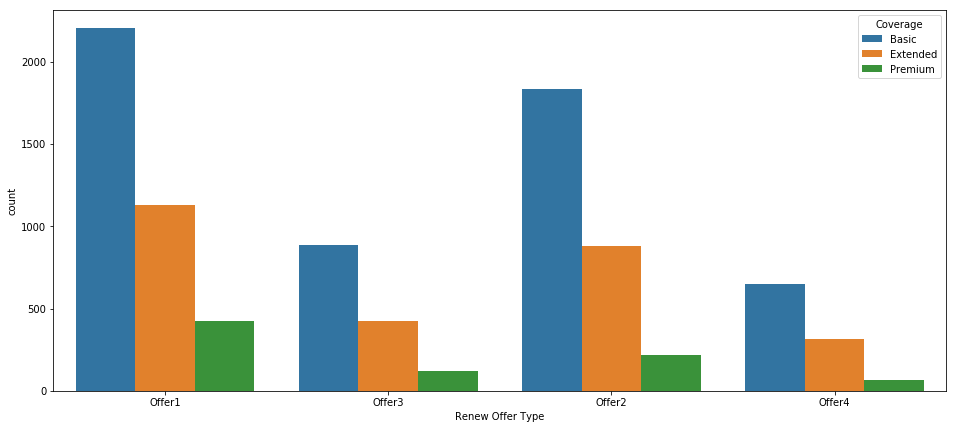

<Figure size 432x288 with 0 Axes>

In [72]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Renew Offer Type"],hue = insurance["Coverage"],data = insurance)
plt.figure()

<Figure size 432x288 with 0 Axes>

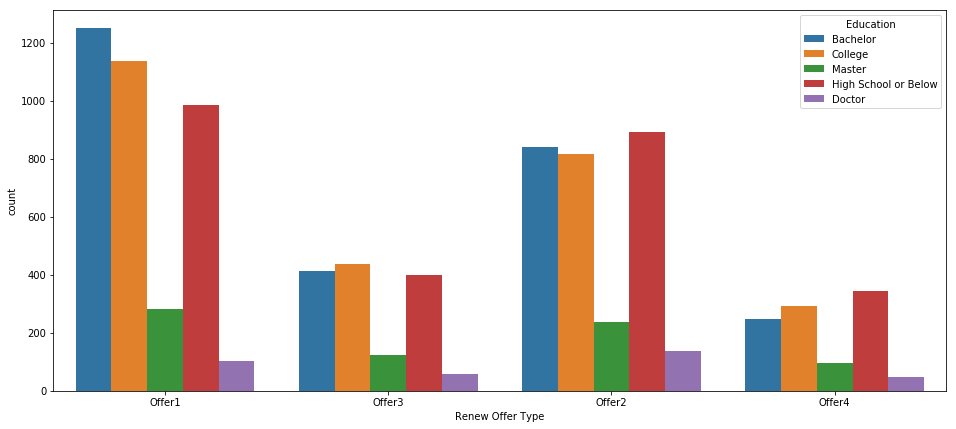

<Figure size 432x288 with 0 Axes>

In [73]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Renew Offer Type"],hue = insurance["Education"],data = insurance)
plt.figure()

<Figure size 432x288 with 0 Axes>

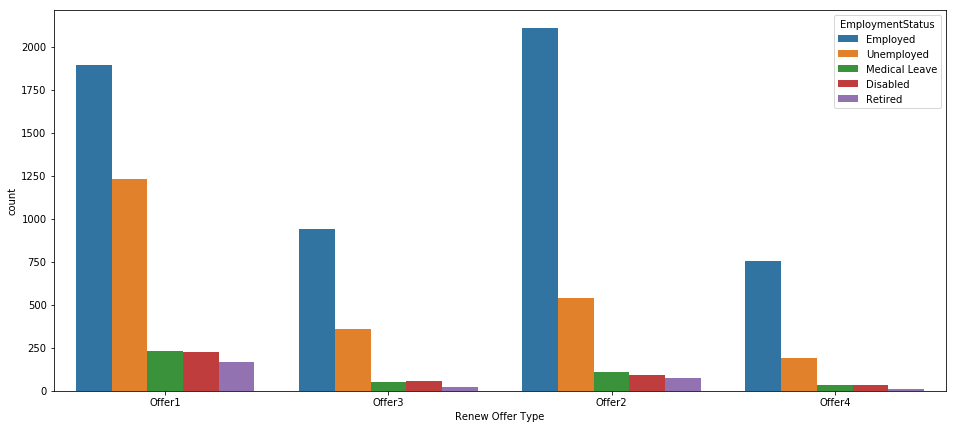

<Figure size 432x288 with 0 Axes>

In [74]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Renew Offer Type"],hue = insurance["EmploymentStatus"],data = insurance)
plt.figure()

<Figure size 432x288 with 0 Axes>

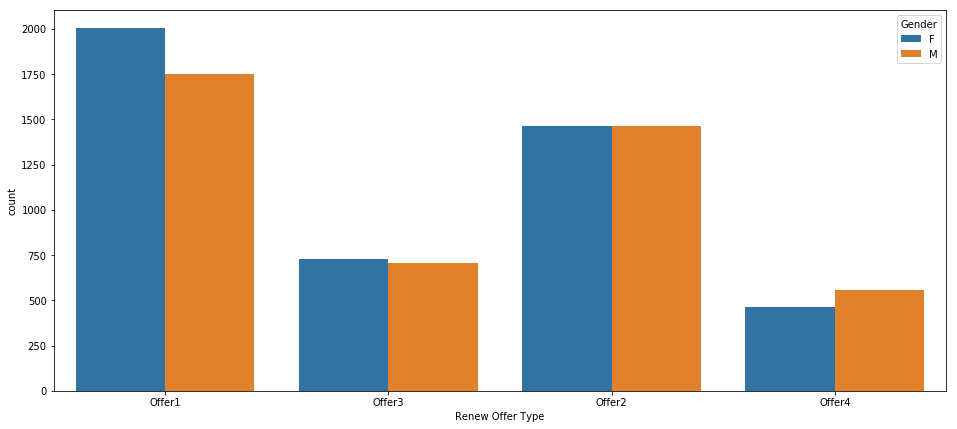

<Figure size 432x288 with 0 Axes>

In [75]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Renew Offer Type"],hue = insurance["Gender"],data = insurance)
plt.figure()

<Figure size 432x288 with 0 Axes>

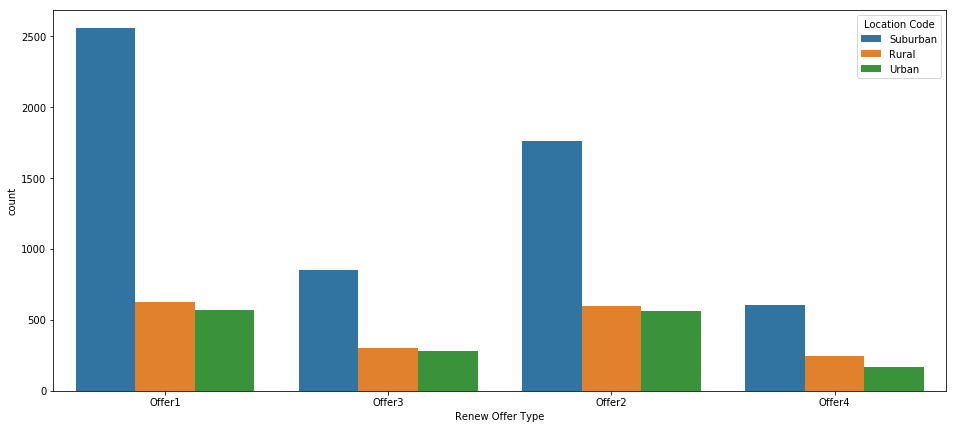

<Figure size 432x288 with 0 Axes>

In [76]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Renew Offer Type"],hue = insurance["Location Code"],data = insurance)
plt.figure()

<Figure size 432x288 with 0 Axes>

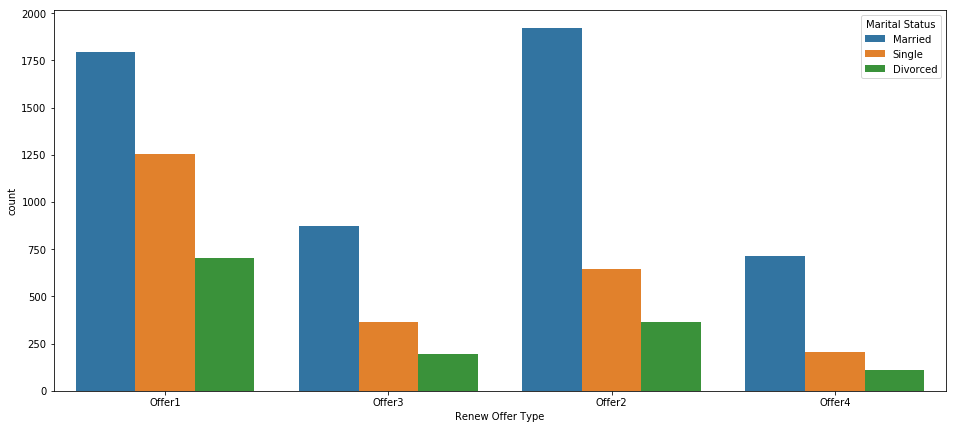

<Figure size 432x288 with 0 Axes>

In [77]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Renew Offer Type"],hue = insurance["Marital Status"],data = insurance)
plt.figure()

<Figure size 432x288 with 0 Axes>

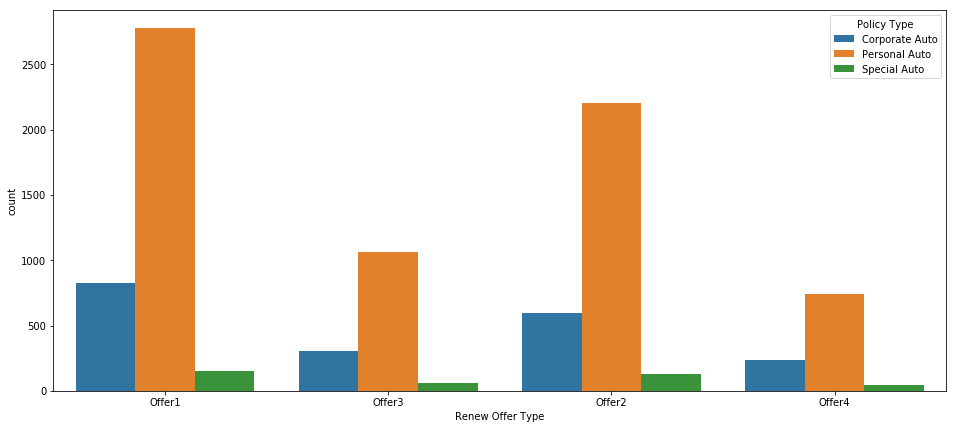

<Figure size 432x288 with 0 Axes>

In [78]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Renew Offer Type"],hue = insurance["Policy Type"],data = insurance)
plt.figure()

<Figure size 432x288 with 0 Axes>

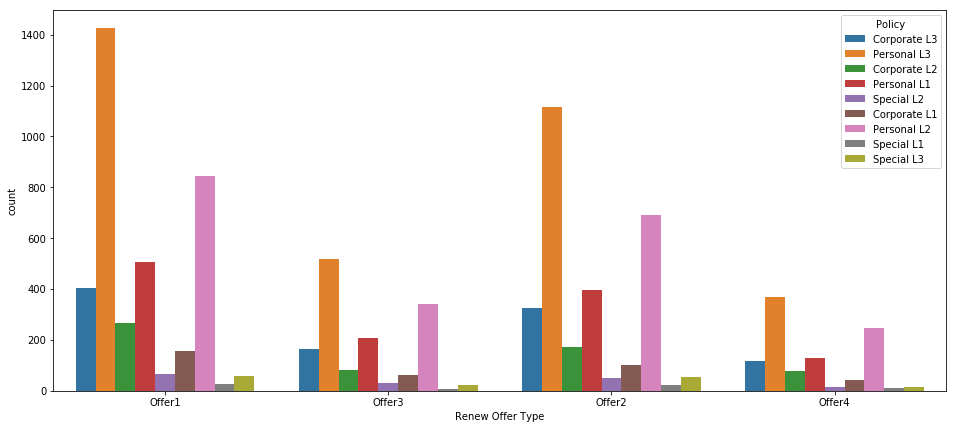

<Figure size 432x288 with 0 Axes>

In [79]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Renew Offer Type"],hue = insurance["Policy"],data = insurance)
plt.figure()

In [80]:
insurance["Sales Channel"].value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Sales Channel, dtype: int64

<Figure size 432x288 with 0 Axes>

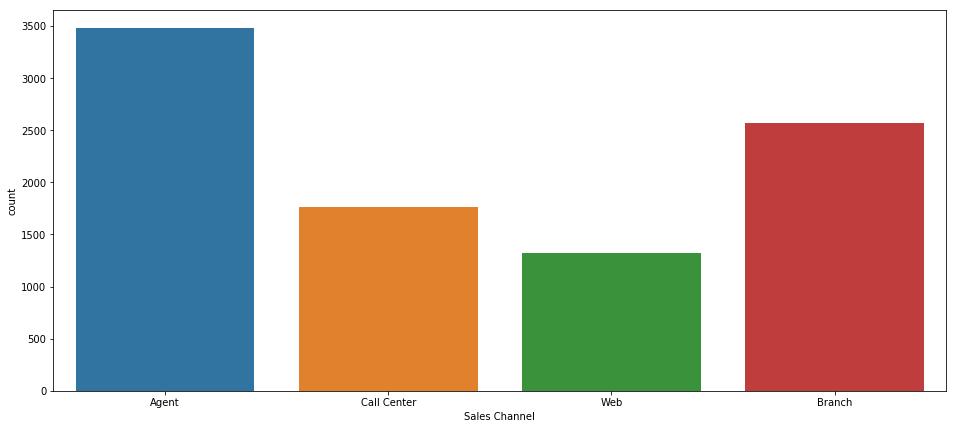

<Figure size 432x288 with 0 Axes>

In [81]:
plt.figure(figsize = (16,7))
sns.countplot(insurance["Sales Channel"])
plt.figure()

<Figure size 432x288 with 0 Axes>

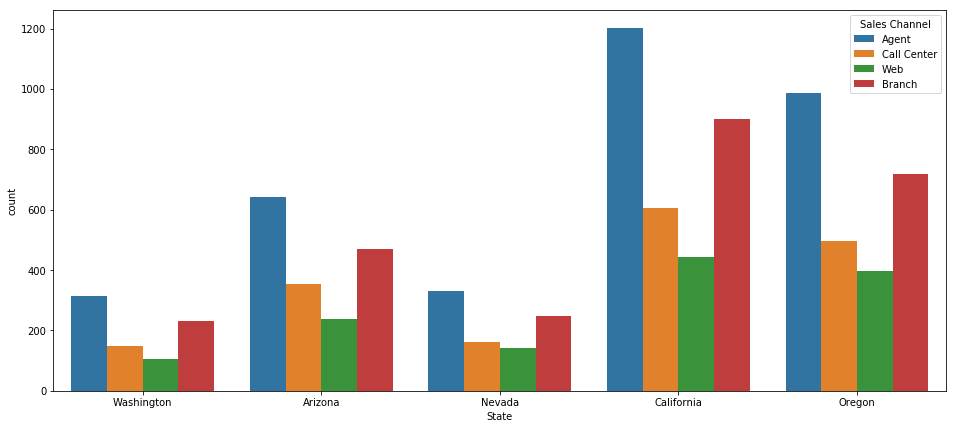

<Figure size 432x288 with 0 Axes>

In [82]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["State"],hue = insurance["Sales Channel"],data = insurance)
plt.figure()

<Figure size 432x288 with 0 Axes>

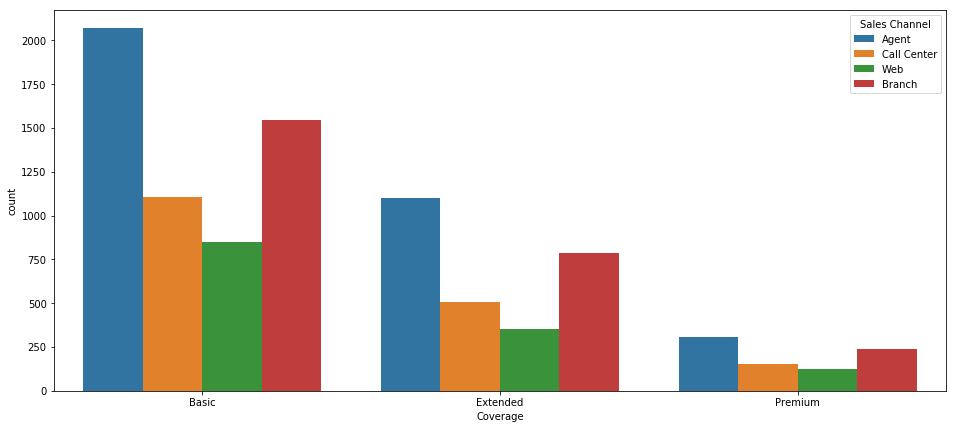

<Figure size 432x288 with 0 Axes>

In [83]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Coverage"],hue = insurance["Sales Channel"],data = insurance)
plt.figure()

<Figure size 432x288 with 0 Axes>

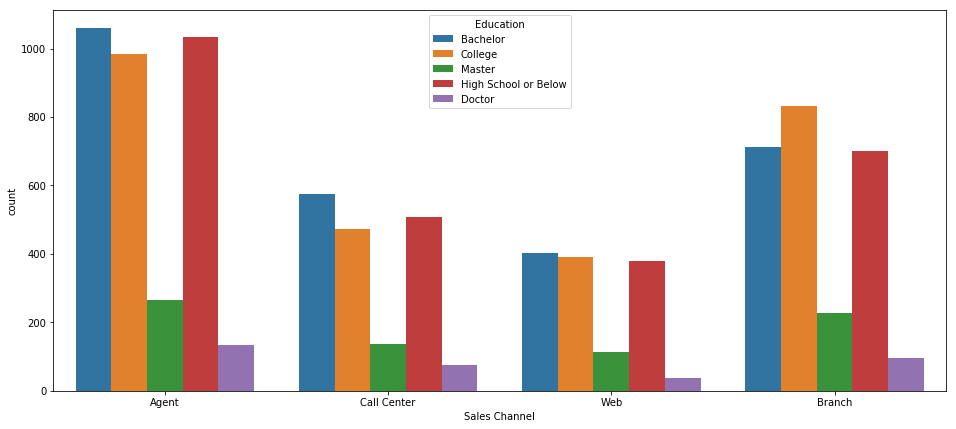

<Figure size 432x288 with 0 Axes>

In [84]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Sales Channel"],hue = insurance["Education"],data = insurance)
plt.figure()

<Figure size 432x288 with 0 Axes>

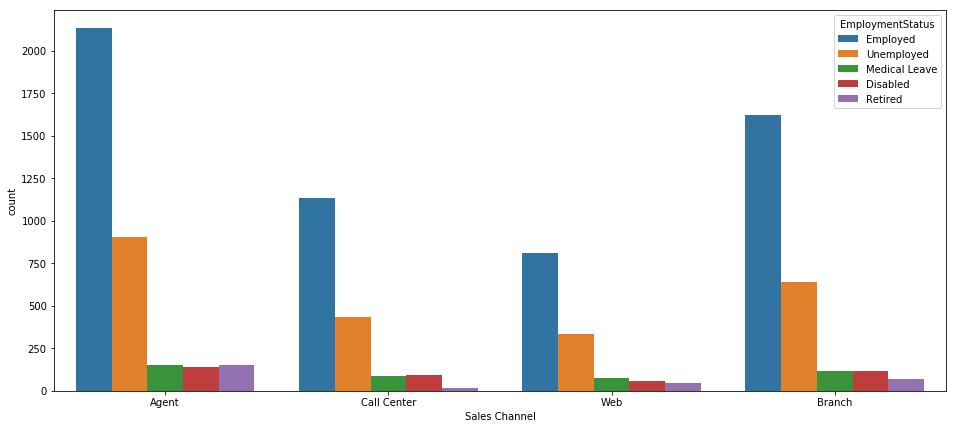

<Figure size 432x288 with 0 Axes>

In [85]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Sales Channel"],hue = insurance["EmploymentStatus"],data = insurance)
plt.figure()

<Figure size 432x288 with 0 Axes>

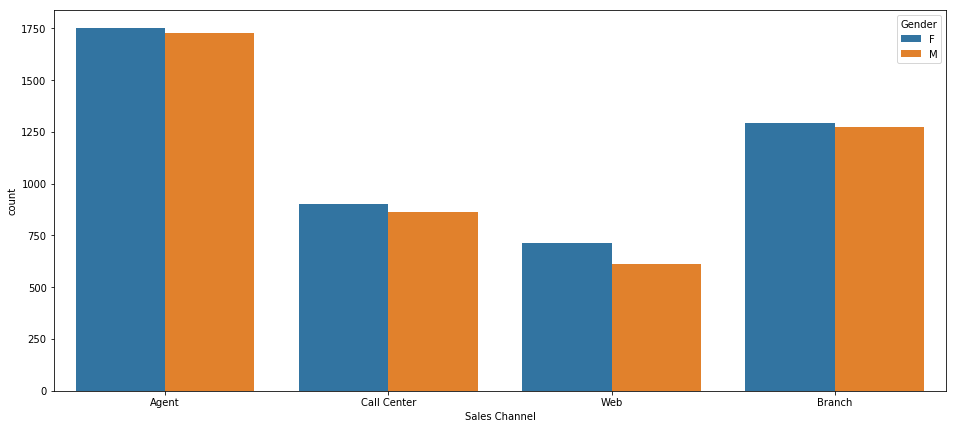

<Figure size 432x288 with 0 Axes>

In [86]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Sales Channel"],hue = insurance["Gender"],data = insurance)
plt.figure()

<Figure size 432x288 with 0 Axes>

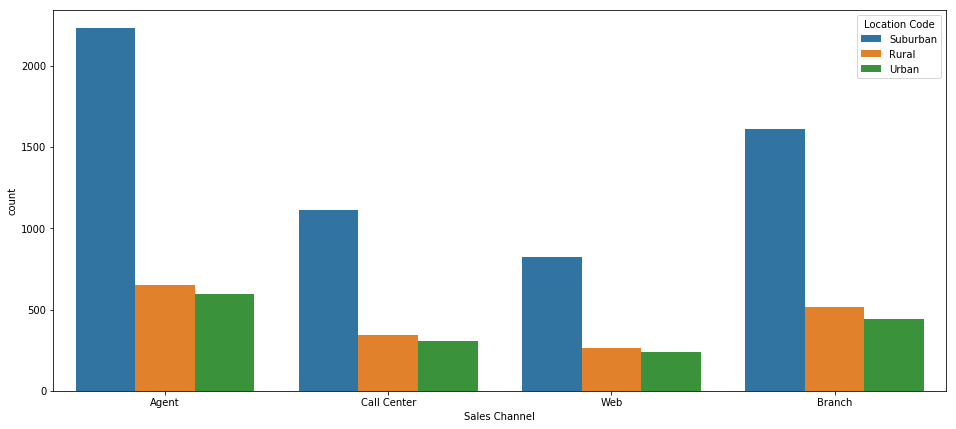

<Figure size 432x288 with 0 Axes>

In [87]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Sales Channel"],hue = insurance["Location Code"],data = insurance)
plt.figure()

<Figure size 432x288 with 0 Axes>

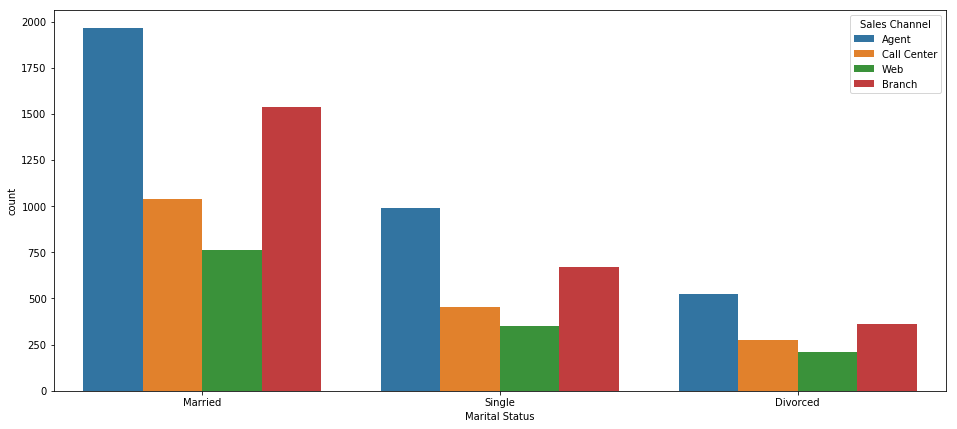

<Figure size 432x288 with 0 Axes>

In [88]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Marital Status"],hue = insurance["Sales Channel"],data = insurance)
plt.figure()

<Figure size 432x288 with 0 Axes>

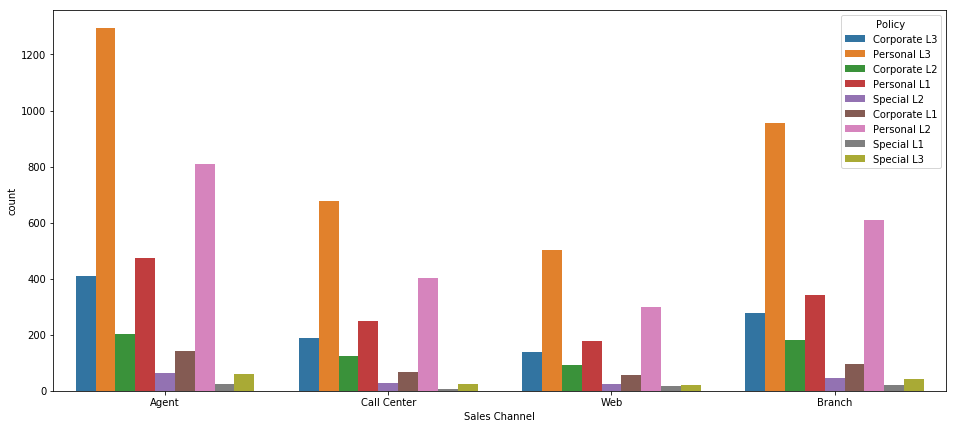

<Figure size 432x288 with 0 Axes>

In [89]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Sales Channel"],hue = insurance["Policy"],data = insurance)
plt.figure()

<Figure size 432x288 with 0 Axes>

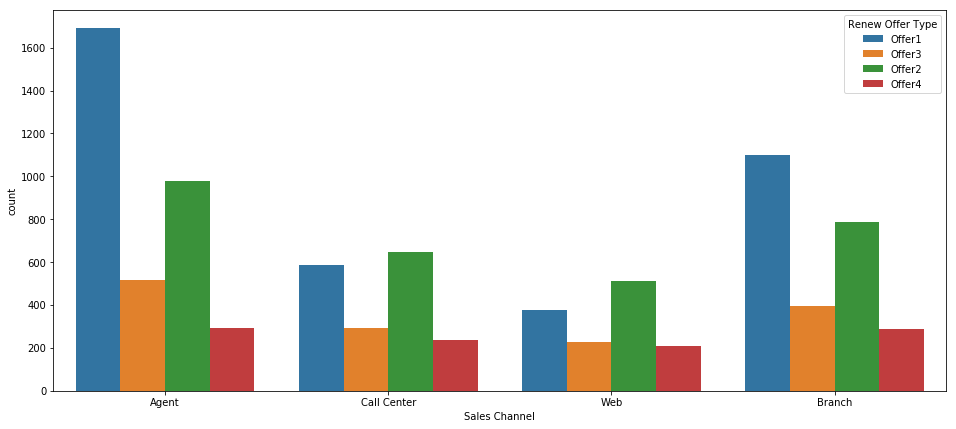

<Figure size 432x288 with 0 Axes>

In [90]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Sales Channel"],hue = insurance["Renew Offer Type"],data = insurance)
plt.figure()

In [91]:
insurance["Vehicle Class"].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle Class, dtype: int64

<Figure size 432x288 with 0 Axes>

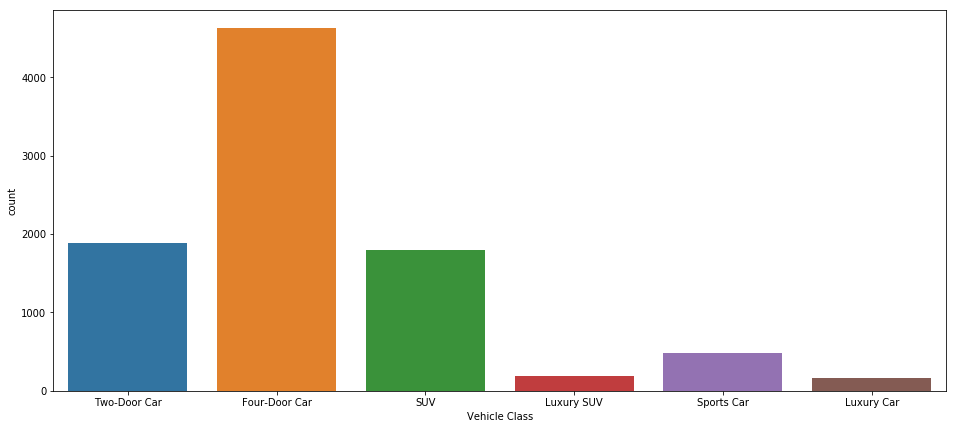

<Figure size 432x288 with 0 Axes>

In [92]:
plt.figure(figsize = (16,7))
sns.countplot(insurance["Vehicle Class"])
plt.figure()

<Figure size 432x288 with 0 Axes>

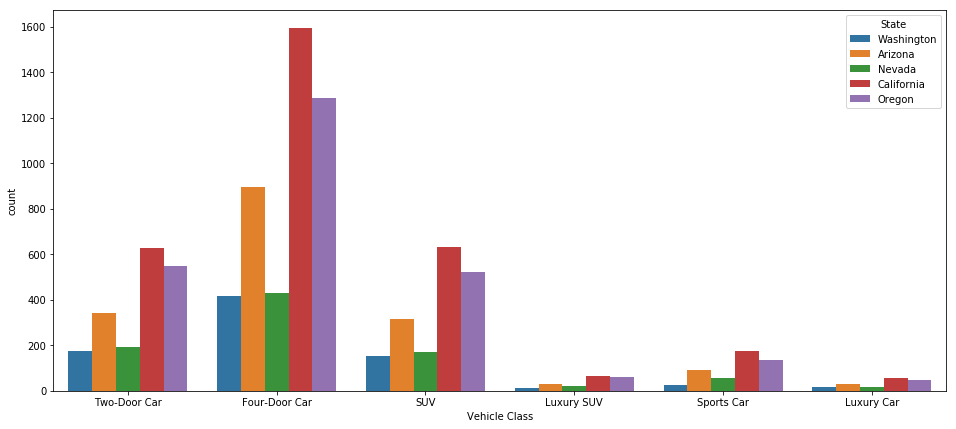

<Figure size 432x288 with 0 Axes>

In [93]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Vehicle Class"],hue = insurance["State"],data = insurance)
plt.figure()

<Figure size 432x288 with 0 Axes>

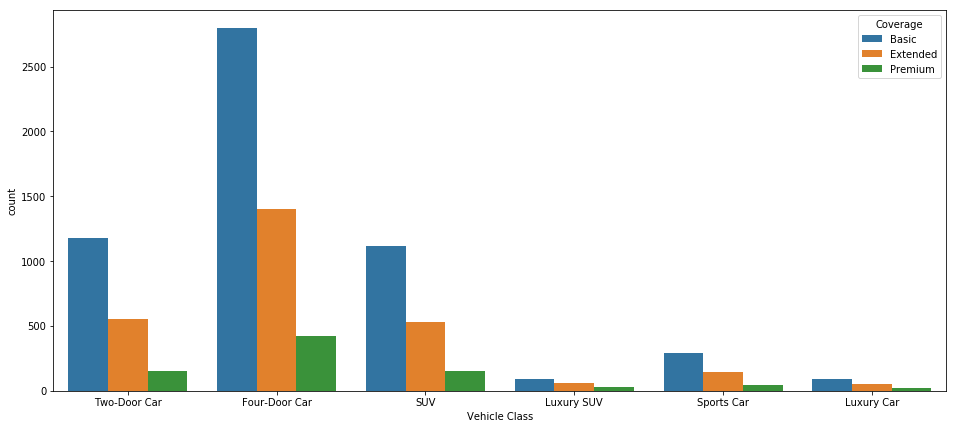

<Figure size 432x288 with 0 Axes>

In [94]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Vehicle Class"],hue = insurance["Coverage"],data = insurance)
plt.figure()

<Figure size 432x288 with 0 Axes>

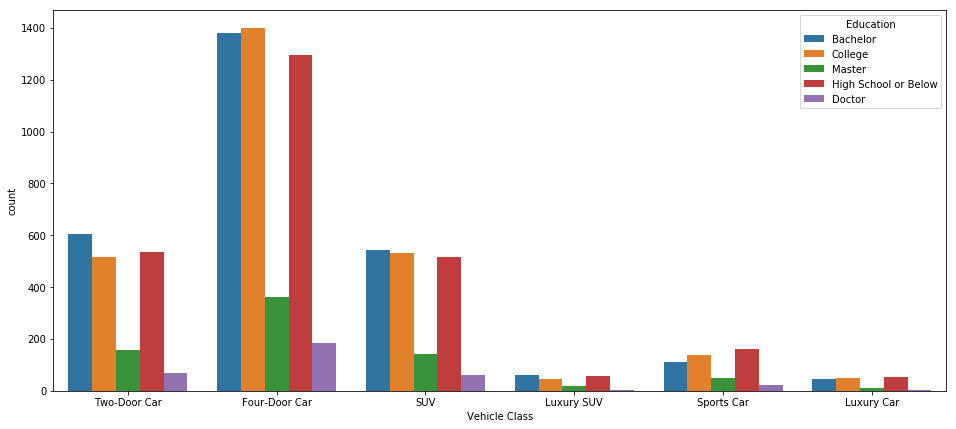

<Figure size 432x288 with 0 Axes>

In [95]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Vehicle Class"],hue = insurance["Education"],data = insurance)
plt.figure()

In [96]:
f = insurance.groupby(insurance["Vehicle Class"])
f1 = f.get_group("Two-Door Car")
f2 = f.get_group("Four-Door Car")
f3 = f.get_group("SUV")
f4 = f.get_group("Luxury SUV")
f5 = f.get_group("Sports Car")
f6 = f.get_group("Luxury Car")


In [97]:
f6["EmploymentStatus"].value_counts() , f4["EmploymentStatus"].value_counts()

(Employed         110
 Unemployed        43
 Disabled           9
 Medical Leave      1
 Name: EmploymentStatus, dtype: int64, Employed         117
 Unemployed        46
 Medical Leave      9
 Retired            7
 Disabled           5
 Name: EmploymentStatus, dtype: int64)

<Figure size 432x288 with 0 Axes>

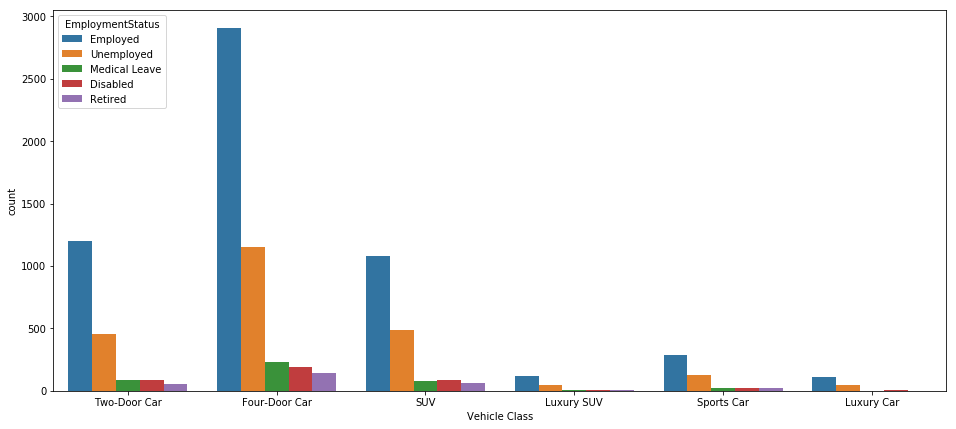

<Figure size 432x288 with 0 Axes>

In [98]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Vehicle Class"],hue = insurance["EmploymentStatus"],data = insurance)
plt.figure()

<Figure size 432x288 with 0 Axes>

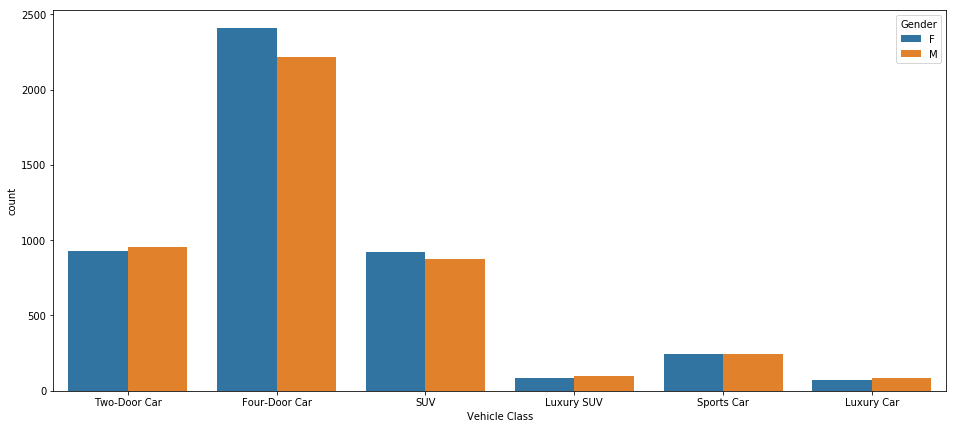

<Figure size 432x288 with 0 Axes>

In [99]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Vehicle Class"],hue = insurance["Gender"],data = insurance)
plt.figure()

<Figure size 432x288 with 0 Axes>

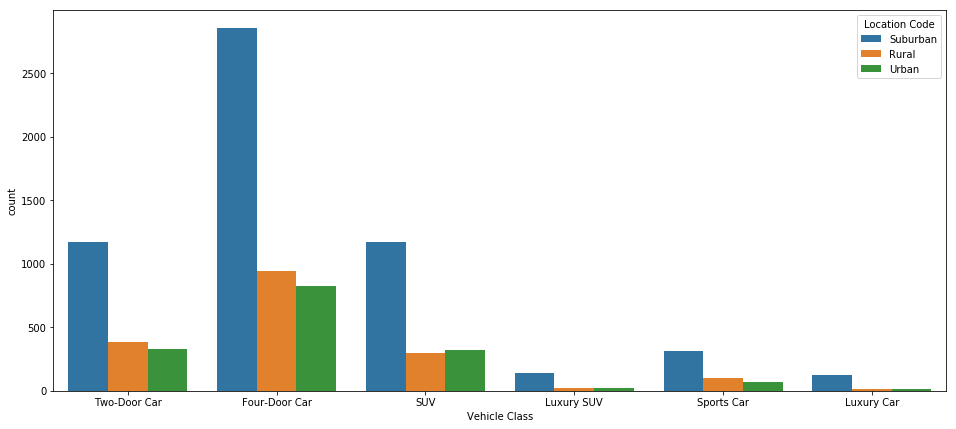

<Figure size 432x288 with 0 Axes>

In [100]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Vehicle Class"],hue = insurance["Location Code"],data = insurance)
plt.figure()

<Figure size 432x288 with 0 Axes>

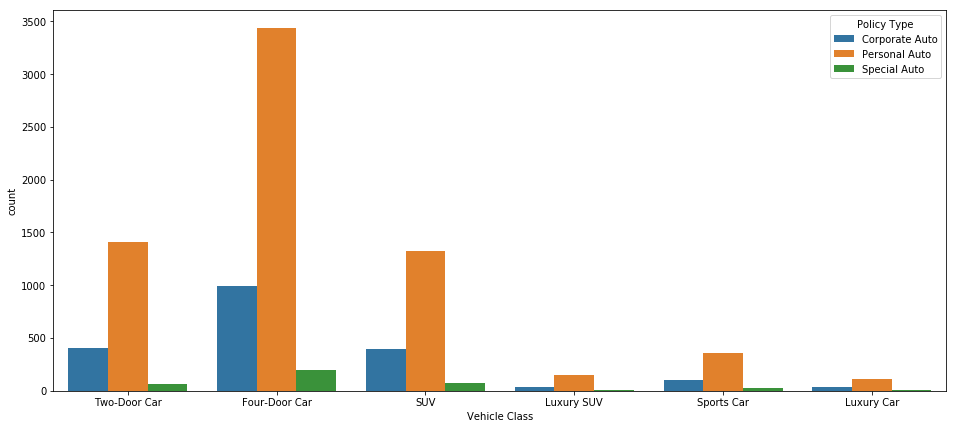

<Figure size 432x288 with 0 Axes>

In [101]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Vehicle Class"],hue = insurance["Policy Type"],data = insurance)
plt.figure()

<Figure size 432x288 with 0 Axes>

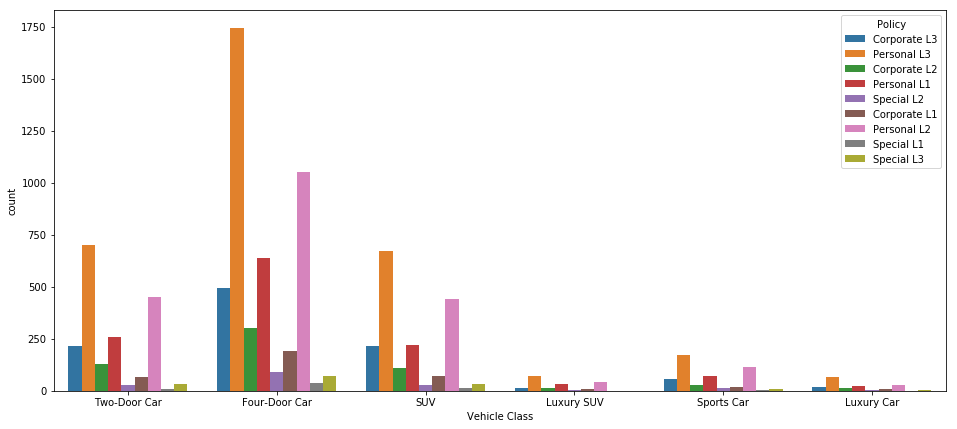

<Figure size 432x288 with 0 Axes>

In [102]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Vehicle Class"],hue = insurance["Policy"],data = insurance)
plt.figure()

<Figure size 432x288 with 0 Axes>

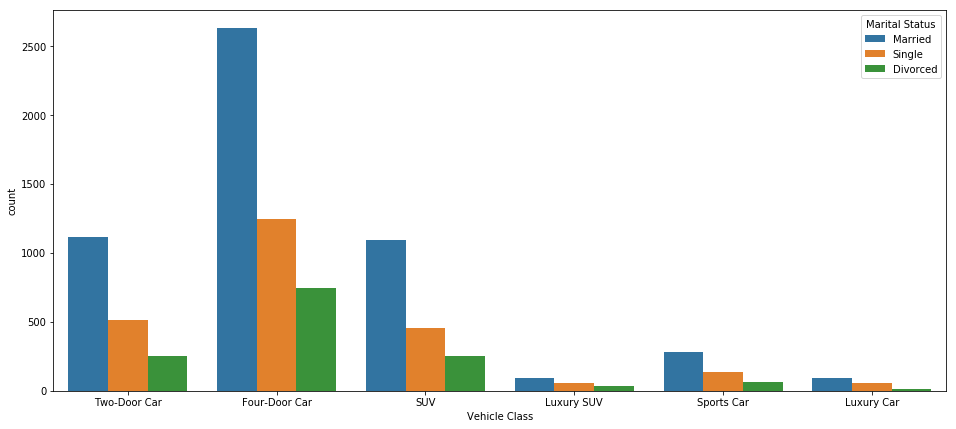

<Figure size 432x288 with 0 Axes>

In [103]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Vehicle Class"],hue = insurance["Marital Status"],data = insurance)
plt.figure()

<Figure size 432x288 with 0 Axes>

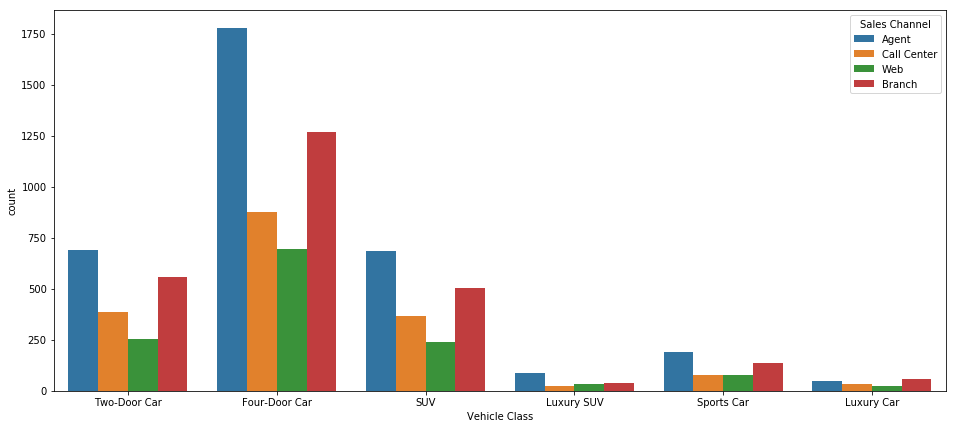

<Figure size 432x288 with 0 Axes>

In [104]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Vehicle Class"],hue = insurance["Sales Channel"],data = insurance)
plt.figure()

<Figure size 432x288 with 0 Axes>

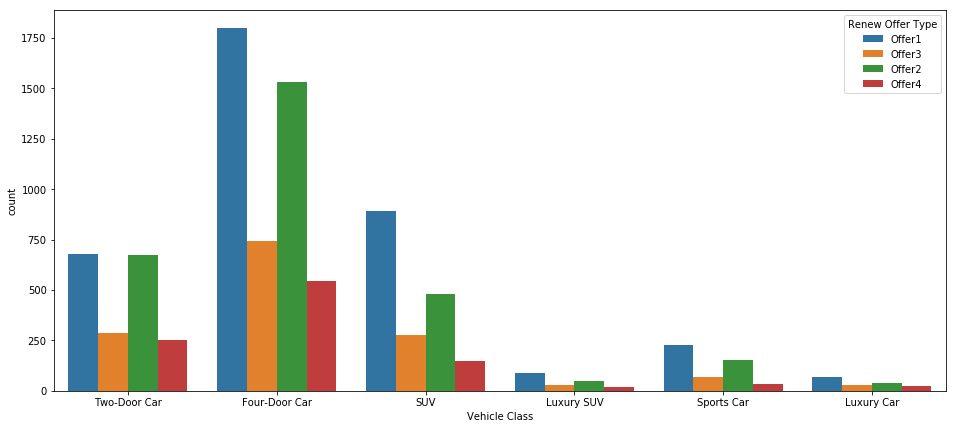

<Figure size 432x288 with 0 Axes>

In [105]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Vehicle Class"],hue = insurance["Renew Offer Type"],data = insurance)
plt.figure()

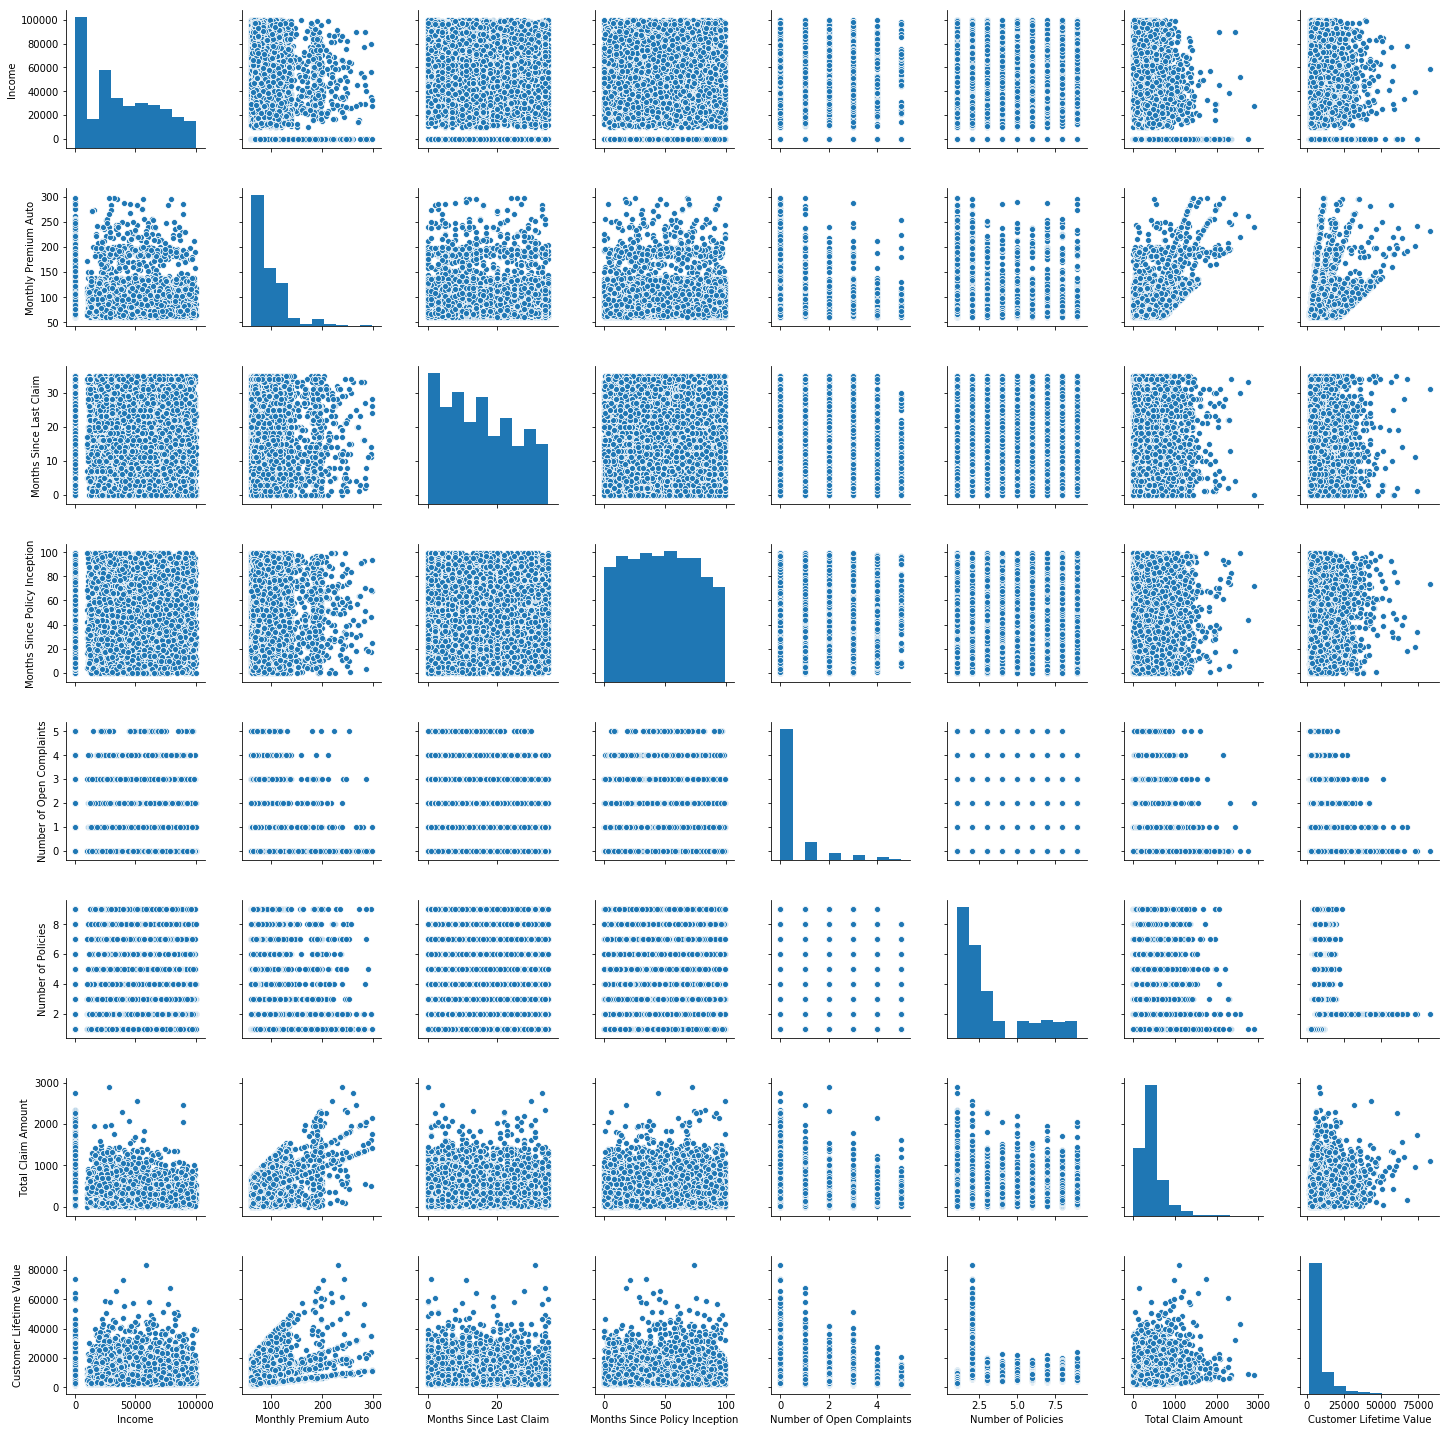

In [106]:
sns.pairplot(insurance[features_float])

In [107]:
insurance[features_float].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
Income                           9134 non-null int64
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               9134 non-null int64
Total Claim Amount               9134 non-null float64
Customer Lifetime Value          9134 non-null float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


In [108]:
insurance[features_float].head()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Customer Lifetime Value
0,56274,69,32,5,0,1,384.811147,2763.519279
1,0,94,13,42,0,8,1131.464935,6979.535903
2,48767,108,18,38,0,2,566.472247,12887.431650
3,0,106,18,65,0,7,529.881344,7645.861827
4,43836,73,12,44,0,1,138.130879,2813.692575


In [109]:
insurance[features_obj].columns

Index(['State', 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
       'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [110]:
"Vehicle Class","Vehicle Size"

('Vehicle Class', 'Vehicle Size')

In [111]:
insurance["Vehicle Size"].value_counts()

Medsize    6424
Small      1764
Large       946
Name: Vehicle Size, dtype: int64

<Figure size 432x288 with 0 Axes>

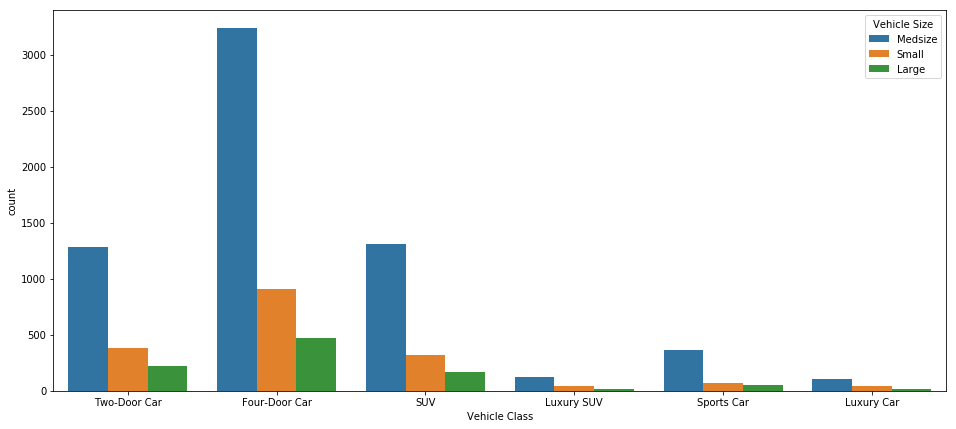

<Figure size 432x288 with 0 Axes>

In [112]:
plt.figure(figsize = (16,7))
sns.countplot(x = insurance["Vehicle Class"],hue = insurance["Vehicle Size"],data = insurance)
plt.figure()

<Figure size 432x288 with 0 Axes>

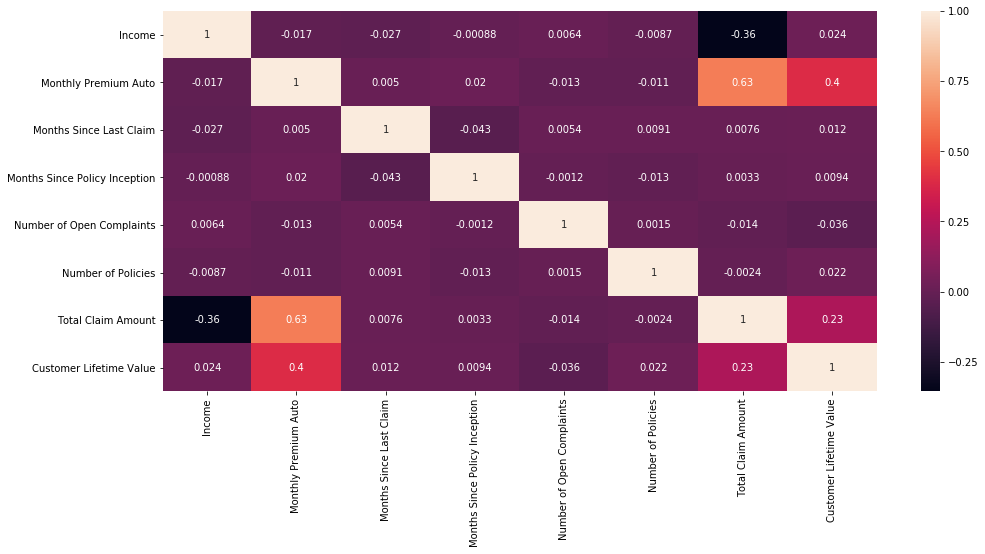

<Figure size 432x288 with 0 Axes>

In [113]:
plt.figure(figsize = (16,7))
sns.heatmap(insurance.corr(),annot = True)
plt.figure()

In [114]:
# !python -m ensurepip --default-pip

In [115]:
# !pip --version

In [116]:
# !pip install plotly

In [117]:
# !pip install lifelines

In [118]:
# !pip install pandas

In [119]:
# !pip install rpy2

In [120]:
insurance['Customer'].head()

0    BU79786
1    QZ44356
2    AI49188
3    WW63253
4    HB64268
Name: Customer, dtype: object

In [121]:
import plotly.plotly as py
import plotly.tools as tls   
from plotly.graph_objs import *

In [122]:
import lifelines as ll

In [123]:
from lifelines import KaplanMeierFitter

In [124]:
insurance[features_float].columns

Index(['Income', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Total Claim Amount', 'Customer Lifetime Value'],
      dtype='object')

In [125]:
insurance["Months Since Policy Inception"].max(),insurance["Months Since Policy Inception"].min()

(99, 0)

In [126]:
insurance["Months Since Last Claim"].max(),insurance["Months Since Last Claim"].min()

(35, 0)

In [127]:
kmf = KaplanMeierFitter()
T = insurance["Months Since Policy Inception"]
C = insurance['Months Since Last Claim']

In [128]:
kmf.fit(T,C)

<lifelines.KaplanMeierFitter: fitted with 9134 observations, 314 censored>

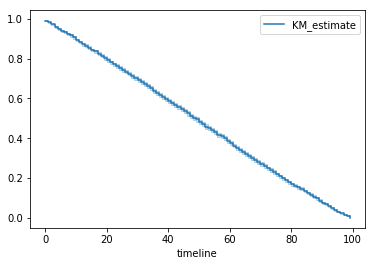

In [129]:
kmf.plot()

In [130]:
kmf1 = KaplanMeierFitter()
f = insurance.Coverage=="Basic"
T = insurance[f]['Months Since Policy Inception']
C = insurance[f]['Months Since Last Claim']


In [131]:
kmf.fit(T,C)

<lifelines.KaplanMeierFitter: fitted with 5568 observations, 190 censored>

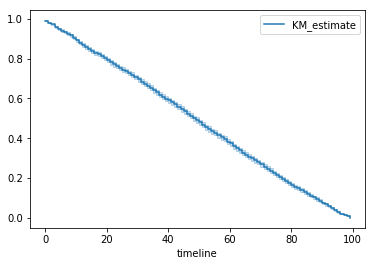

In [132]:

kmf.plot()
# plt.figure(figsize = (15,6))

In [133]:
insurance[f]['Months Since Last Claim'].head()

0    32
3    18
4    12
5    14
6     0
Name: Months Since Last Claim, dtype: int64

In [134]:
insurance[insurance["Coverage"] == "Basic"]["Gender"].head()

0    F
3    M
4    M
5    F
6    F
Name: Gender, dtype: object

### SURVIVAL ANALYSIS:

In [135]:
kmf1 = KaplanMeierFitter()
ax = subplot(111)
for r in insurance["Coverage"].unique():
    a = insurance[insurance["Coverage"] == r]
    kmf1.fit(a['Months Since Policy Inception'], a['Months Since Last Claim'],label = r)
    ax = kmf1.plot(ax = ax)

NameError: name 'subplot' is not defined

In [ ]:
kmf1 = KaplanMeierFitter()
ax = subplot(111)
for r in insurance["State"].unique():
    a = insurance[insurance["State"] == r]
    kmf1.fit(a['Months Since Policy Inception'], a['Months Since Last Claim'],label = r)
    ax = kmf1.plot(ax = ax)

In [ ]:
kmf1 = KaplanMeierFitter()
T = insurance['Months Since Policy Inception']
C = insurance['Months Since Last Claim']
ax = subplot(111)
for r in insurance["Education"].unique():
    a = insurance[insurance["Education"] == r]
    kmf1.fit(a['Months Since Policy Inception'], a['Months Since Last Claim'],label = r)
    ax = kmf1.plot(ax = ax)

In [ ]:
kmf1 = KaplanMeierFitter()

ax = subplot(111)
for r in insurance["EmploymentStatus"].unique():
    a = insurance[insurance["EmploymentStatus"] == r]
    kmf1.fit(a['Months Since Policy Inception'], a['Months Since Last Claim'],label = r)
    ax = kmf1.plot(ax = ax)

In [ ]:
kmf1 = KaplanMeierFitter()
T = insurance['Months Since Policy Inception']
C = insurance['Months Since Last Claim']
ax = subplot(111)
for r in insurance["Gender"].unique():
    a = insurance[insurance["Gender"] == r]
    kmf1.fit(a['Months Since Policy Inception'], a['Months Since Last Claim'],label = r)
    ax = kmf1.plot(ax = ax)

In [ ]:
kmf1 = KaplanMeierFitter()
T = insurance['Months Since Policy Inception']
C = insurance['Months Since Last Claim']
ax = subplot(111)
for r in insurance["Location Code"].unique():
    a = insurance[insurance["Location Code"] == r]
    kmf1.fit(a['Months Since Policy Inception'], a['Months Since Last Claim'],label = r)
    ax = kmf1.plot(ax = ax)

In [ ]:
kmf1 = KaplanMeierFitter()
ax = subplot(111)
for r in insurance["Marital Status"].unique():
    a = insurance[insurance["Marital Status"] == r]
    kmf1.fit(a['Months Since Policy Inception'], a['Months Since Last Claim'],label = r)
    ax = kmf1.plot(ax = ax)

In [ ]:
kmf1 = KaplanMeierFitter()
ax = subplot(111)
for r in insurance["Policy Type"].unique():
    a = insurance[insurance["Policy Type"] == r]
    kmf1.fit(a['Months Since Policy Inception'], a['Months Since Last Claim'],label = r)
    ax = kmf1.plot(ax = ax)

In [ ]:
kmf1 = KaplanMeierFitter()
ax = subplot(111)
for r in insurance["Policy"].unique():
    a = insurance[insurance["Policy"] == r]
    kmf1.fit(a['Months Since Policy Inception'], a['Months Since Last Claim'],label = r)
    ax = kmf1.plot(ax = ax)

In [ ]:
kmf1 = KaplanMeierFitter()
ax = subplot(111)
for r in insurance["Renew Offer Type"].unique():
    a = insurance[insurance["Renew Offer Type"] == r]
    kmf1.fit(a['Months Since Policy Inception'], a['Months Since Last Claim'],label = r)
    ax = kmf1.plot(ax = ax)

In [ ]:
kmf1 = KaplanMeierFitter()
ax = subplot(111)
for r in insurance["Sales Channel"].unique():
    a = insurance[insurance["Sales Channel"] == r]
    kmf1.fit(a['Months Since Policy Inception'], a['Months Since Last Claim'],label = r)
    ax = kmf1.plot(ax = ax)

In [ ]:
kmf1 = KaplanMeierFitter()
ax = subplot(111)
for r in insurance["Vehicle Class"].unique():
    a = insurance[insurance["Vehicle Class"] == r]
    kmf1.fit(a['Months Since Policy Inception'], a['Months Since Last Claim'],label = r)
    ax = kmf1.plot(ax = ax)

In [ ]:
kmf1 = KaplanMeierFitter()
ax = subplot(111)
for r in insurance["Vehicle Size"].unique():
    a = insurance[insurance["Vehicle Size"] == r]
    kmf1.fit(a['Months Since Policy Inception'], a['Months Since Last Claim'],label = r)
    ax = kmf1.plot(ax = ax)